## **MELBOURNE HOUSING MARKET DATA CLEANING AND FEATURE SELECTION**

### **1. Abstract**
The objective of this notebook is to perform Exploratory Data Analysis, Data Cleaning and Feature selection on the Melbourne Housing Market data that will help train a linear regression model to predict housing prices.

### **2. Importing Libraries**

In [118]:
import pandas as pd #For Data Analysis and Manipulation
import matplotlib.pyplot as plt # A plotting framework
import seaborn as sns #For Data Visualization

### **3. Loading Data**

In [119]:
data = pd.read_csv('https://github.com/kashyap-datta/MelbourneHousingMarket/raw/main/Melbourne_housing_FULL.csv', sep=',') #Reading CSV file into a dataframe
data.head() #Returns the first five rows in the dataframe

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


**Understanding the Columns**<br>
<br>
**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in Australian dollars

**Method**:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

**Type**:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD in Kilometres

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explainatory

**Longtitude**: Self explainatory

### **4. Understanding Data and Preprocessing**

Lets see what data types we have and which of them are numeric and categorical variables.

In [120]:
print(data.dtypes) # dtypes returns a Series with the data type of each column
print("Categorical Variables:")
print(data.columns[data.dtypes == 'object'])
print("Numeric Variables:")
print(data.columns[(data.dtypes == 'int64') | (data.dtypes == 'float64')])

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object
Categorical Variables:
Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')
Numeric Variables:
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


Now let's take a look at the summary statistics of our data and check the shape of our data and also if the ranges of data make sense.

In [121]:
data.describe() # Describe() generates descriptive statistics for the data in dataframe.

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


***Do the ranges of the predictor variables make sense?*** <br>
max value for Year shows 2106 which is not possible. It is probably 2016 written as 2106 by mistake so correcting it below.

In [122]:
data[data.YearBuilt == 2106] #Filtering dataframe based on Yearbuilt


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105.0,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0


In [123]:
data.replace(2106,2016, inplace=True) #Replacing 2106 with 2016
data[data.YearBuilt == 2106]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


***Which independent variables have missing data? How much?*** <br>
Finding the missing values below -

In [124]:
data.isnull().sum() # isnull detects missing values in the dataframe and sum() returns the sum of the values

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### **4.1 Cleaning and Imputing missing values**

In [125]:
data[data['Distance'].isnull() == True] # Filtering data for which distance is null

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of missing values so we can drop this entire row.

In [126]:
data.drop(data[data['Distance'].isnull() == True].index, inplace=True) # Removing the index which has distance as null using drop function
data.Distance.isnull().sum() #Checking if the row is dropped

0

In [127]:
data[data['Postcode'].isnull() == True] # Filtering data for which Postcode is null

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [128]:
data[data['CouncilArea'].isnull() == True] # Filtering data for which CouncilArea is null

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
data.drop(data[data['CouncilArea'].isnull() == True].index, inplace=True) # Removing the index (row) which has CouncilArea as null using drop function
data.Distance.isnull().sum()

0

In [130]:
data[data['Regionname'].isnull() == True]  # Filtering data for which Regionname is null

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [131]:
data[data['Propertycount'].isnull() == True]  # Filtering data for which Propertycount is null

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


Filling the missing values in Price column.

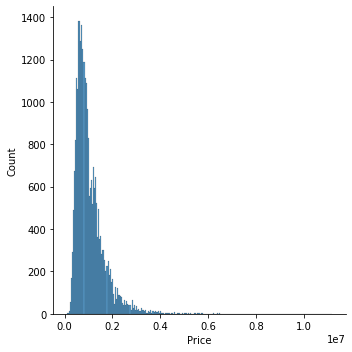

In [132]:
sns.displot(data=data.Price) #Plotting distribution plot for Price

As we can see the distribution of price is skewed. So, it's better to use Median values to replace the NAN values instead of Mean.

In [133]:
data.Price.fillna(data.Price.median(), inplace=True) # Fill NA/NaN values with median of price and updating the data in the same dataframe using inplace parameter as true
print(data.Price.isnull().sum()) #Checking if NaN value is filled
print(data.Price.median()) #Checking the median of the price

0
870000.0


Filling the missing values in Bathroom,Bedroom2,Car columns.

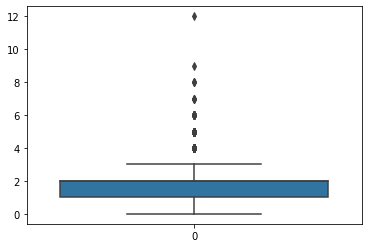

In [134]:
sns.boxplot(data=data.Bathroom) #Plotting boxplot for Bathroom

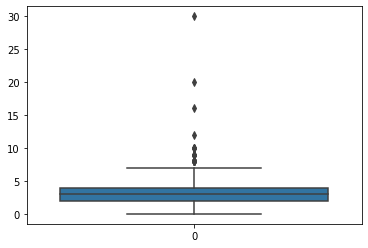

In [135]:
sns.boxplot(data=data.Bedroom2) #Plotting boxplot for Bedroom2

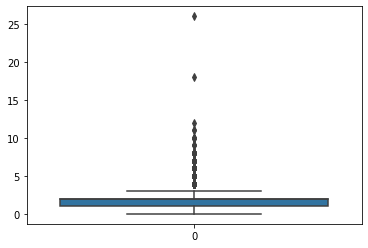

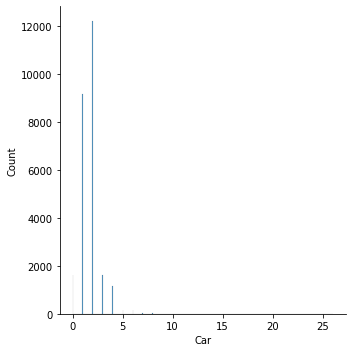

In [136]:
sns.boxplot(data=data.Car) #Plotting boxplot for Car
sns.displot(data=data.Car) #Plotting distribution plot for Car

From the above boxplots, as the distributions of Bathroom,Bedroom2,Car columns are skewed and as they are categorical in nature, I will replace them with their mode values.

Before filling with mode, Checking the value counts to confirm that NaN is not the mode for the columns Bedroom2, Bathroom and Car.

In [137]:
data.Bedroom2.value_counts(dropna=False) # Checking the unique values in Bedroom2 variable while also including the Nan values to be counted

3.0     11881
NaN      8214
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
12.0        1
20.0        1
16.0        1
Name: Bedroom2, dtype: int64

In [138]:
data.Bathroom.value_counts(dropna=False) # Checking the unique values in Bathroom variable while also including the Nan values to be counted

1.0     12969
2.0     11064
NaN      8223
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

In [139]:
data.Car.value_counts(dropna=False) # Checking the unique values in Car variable while also including the Nan values to be counted

2.0     12214
1.0      9164
NaN      8725
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64

Clearly NaN isn't the mode, therefore filling missing values in those columns with respective mode values.

In [140]:
data.Bedroom2.fillna(data.Bedroom2.mode()[0], inplace=True) # Fill NA/NaN values with mode of Bedroom2 and updating the data in the same dataframe using inplace parameter as true
data.Bathroom.fillna(data.Bathroom.mode()[0], inplace=True) # Fill NA/NaN values with mode of Bathroom and updating the data in the same dataframe using inplace parameter as true
data.Car.fillna(data.Car.mode()[0], inplace=True) # Fill NA/NaN values with mode of Car and updating the data in the same dataframe using inplace parameter as true

In [141]:
data.Landsize.fillna(data.Landsize.mean(), inplace=True) # Fill NA/NaN values with mean of Landsize and updating the data in the same dataframe using inplace parameter as true
data.BuildingArea.fillna(data.BuildingArea.mean(), inplace=True) # Fill NA/NaN values with mean of BuildingArea and updating the data in the same dataframe using inplace parameter as true

It does not make sense to impute values for YearBuilt, Lattitude and Longitude columns.Imputing Lattitude and Longitude values will conflict with the other columns - Address,Suburb,CouncilArea and Regionname. So dropping all those rows with Nan values for these columns. 

In [142]:
data.dropna(subset=['YearBuilt','Lattitude','Longtitude'], inplace=True) # Droping rows with NA values for a subset of columns and updating the data in the same dataframe using inplace parameter as true

In [143]:
data.isnull().sum() # Checking the sum of null values in each column again

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Checking if there are any duplicate rows

In [144]:
data.duplicated().sum() # duplicated() returns boolean series denoting duplicate rows and we are summing it to find how many are duplicated

1

There is one duplicate row so let's drop it.

In [145]:
data.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [146]:
data.describe() # Describe() generates descriptive statistics for the data in dataframe.

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,15541.000000,1.554100e+04,15541.000000,15541.000000,15541.000000,15541.000000,15541.000000,15541.000000,15541.000000,15541.000000,15541.000000,15541.000000,15541.000000
mean,3.108359,1.031212e+06,11.151329,3117.063702,3.090213,1.670098,1.708513,538.902886,154.857459,1965.272698,-37.809466,144.998989,7521.528602
std,0.986509,5.981523e+05,6.944742,115.189416,1.008762,0.735022,0.993530,989.651083,82.130165,37.301709,0.090193,0.119804,4302.873385
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,129.000000
25%,2.000000,7.000000e+05,6.300000,3047.000000,2.000000,1.000000,1.000000,231.000000,108.000000,1940.000000,-37.861300,144.930700,4442.000000
50%,3.000000,8.700000e+05,10.100000,3101.000000,3.000000,2.000000,2.000000,544.000000,150.000000,1970.000000,-37.807700,145.004800,6763.000000
75%,4.000000,1.190000e+06,14.000000,3155.000000,4.000000,2.000000,2.000000,642.000000,175.000000,2000.000000,-37.754900,145.068700,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,42800.000000,3112.000000,2019.000000,-37.390200,145.526350,21650.000000


From the above stats we can observe that Rooms and Bedroom2 have a similar data. Let's find if they are correlated.

***Is the predictor variables independent of all the other predictor variables?*** <br>
Finding correlation between the features

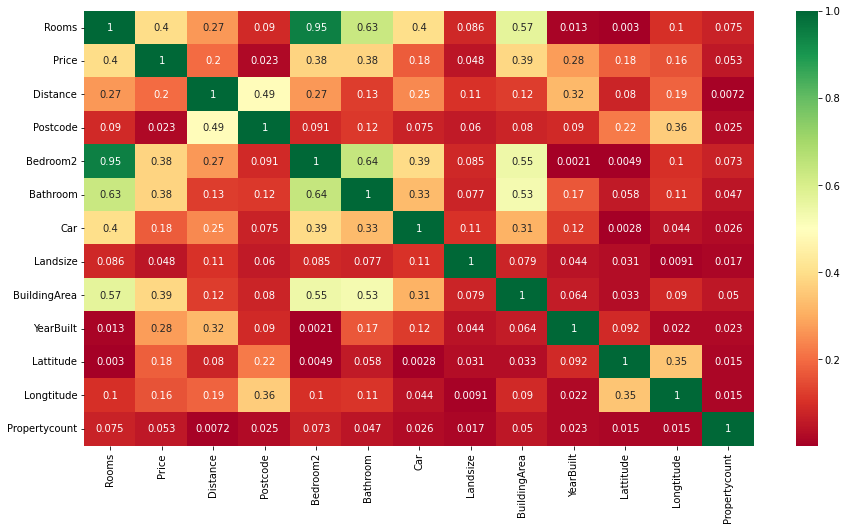

In [147]:
plt.figure(figsize = (15,8)) #Creating a new figure with given width and height in the figsize parameter
sns.heatmap(abs(data.corr()), annot=True,cmap="RdYlGn" ) # Finding Pearson correlation between the columns of the dataframe and plotting it as a heatmap

From the Heatmap clearly the Rooms and Bedroom2 are very highly correlated. And hence we can drop one of them. I am dropping Bedroom2 as it contains minimum value 0.0 which doesn't make sense and also had many null values imputed.

Rooms and Bathroom, Rooms and BuildingArea, Bedroom2 and Bathroom, Bedroom2 and BuildingArea are all well correlated with magnitude greater than 0.5

Rooms and Lattitude, Distance and Propertycount, logitude and Landsize are the least correlated.

Dropping column Bedroom2 as it is highly correlated an hence redundant.

In [148]:
data.drop(columns=['Bedroom2'], inplace=True) # Dropping Bedroom2 column and updating the dataframe

***What are the distributions of the predictor variables?*** <br>
Checking how data is distibuted using pairplot, boxplot and countplots.

<Figure size 1080x576 with 0 Axes>

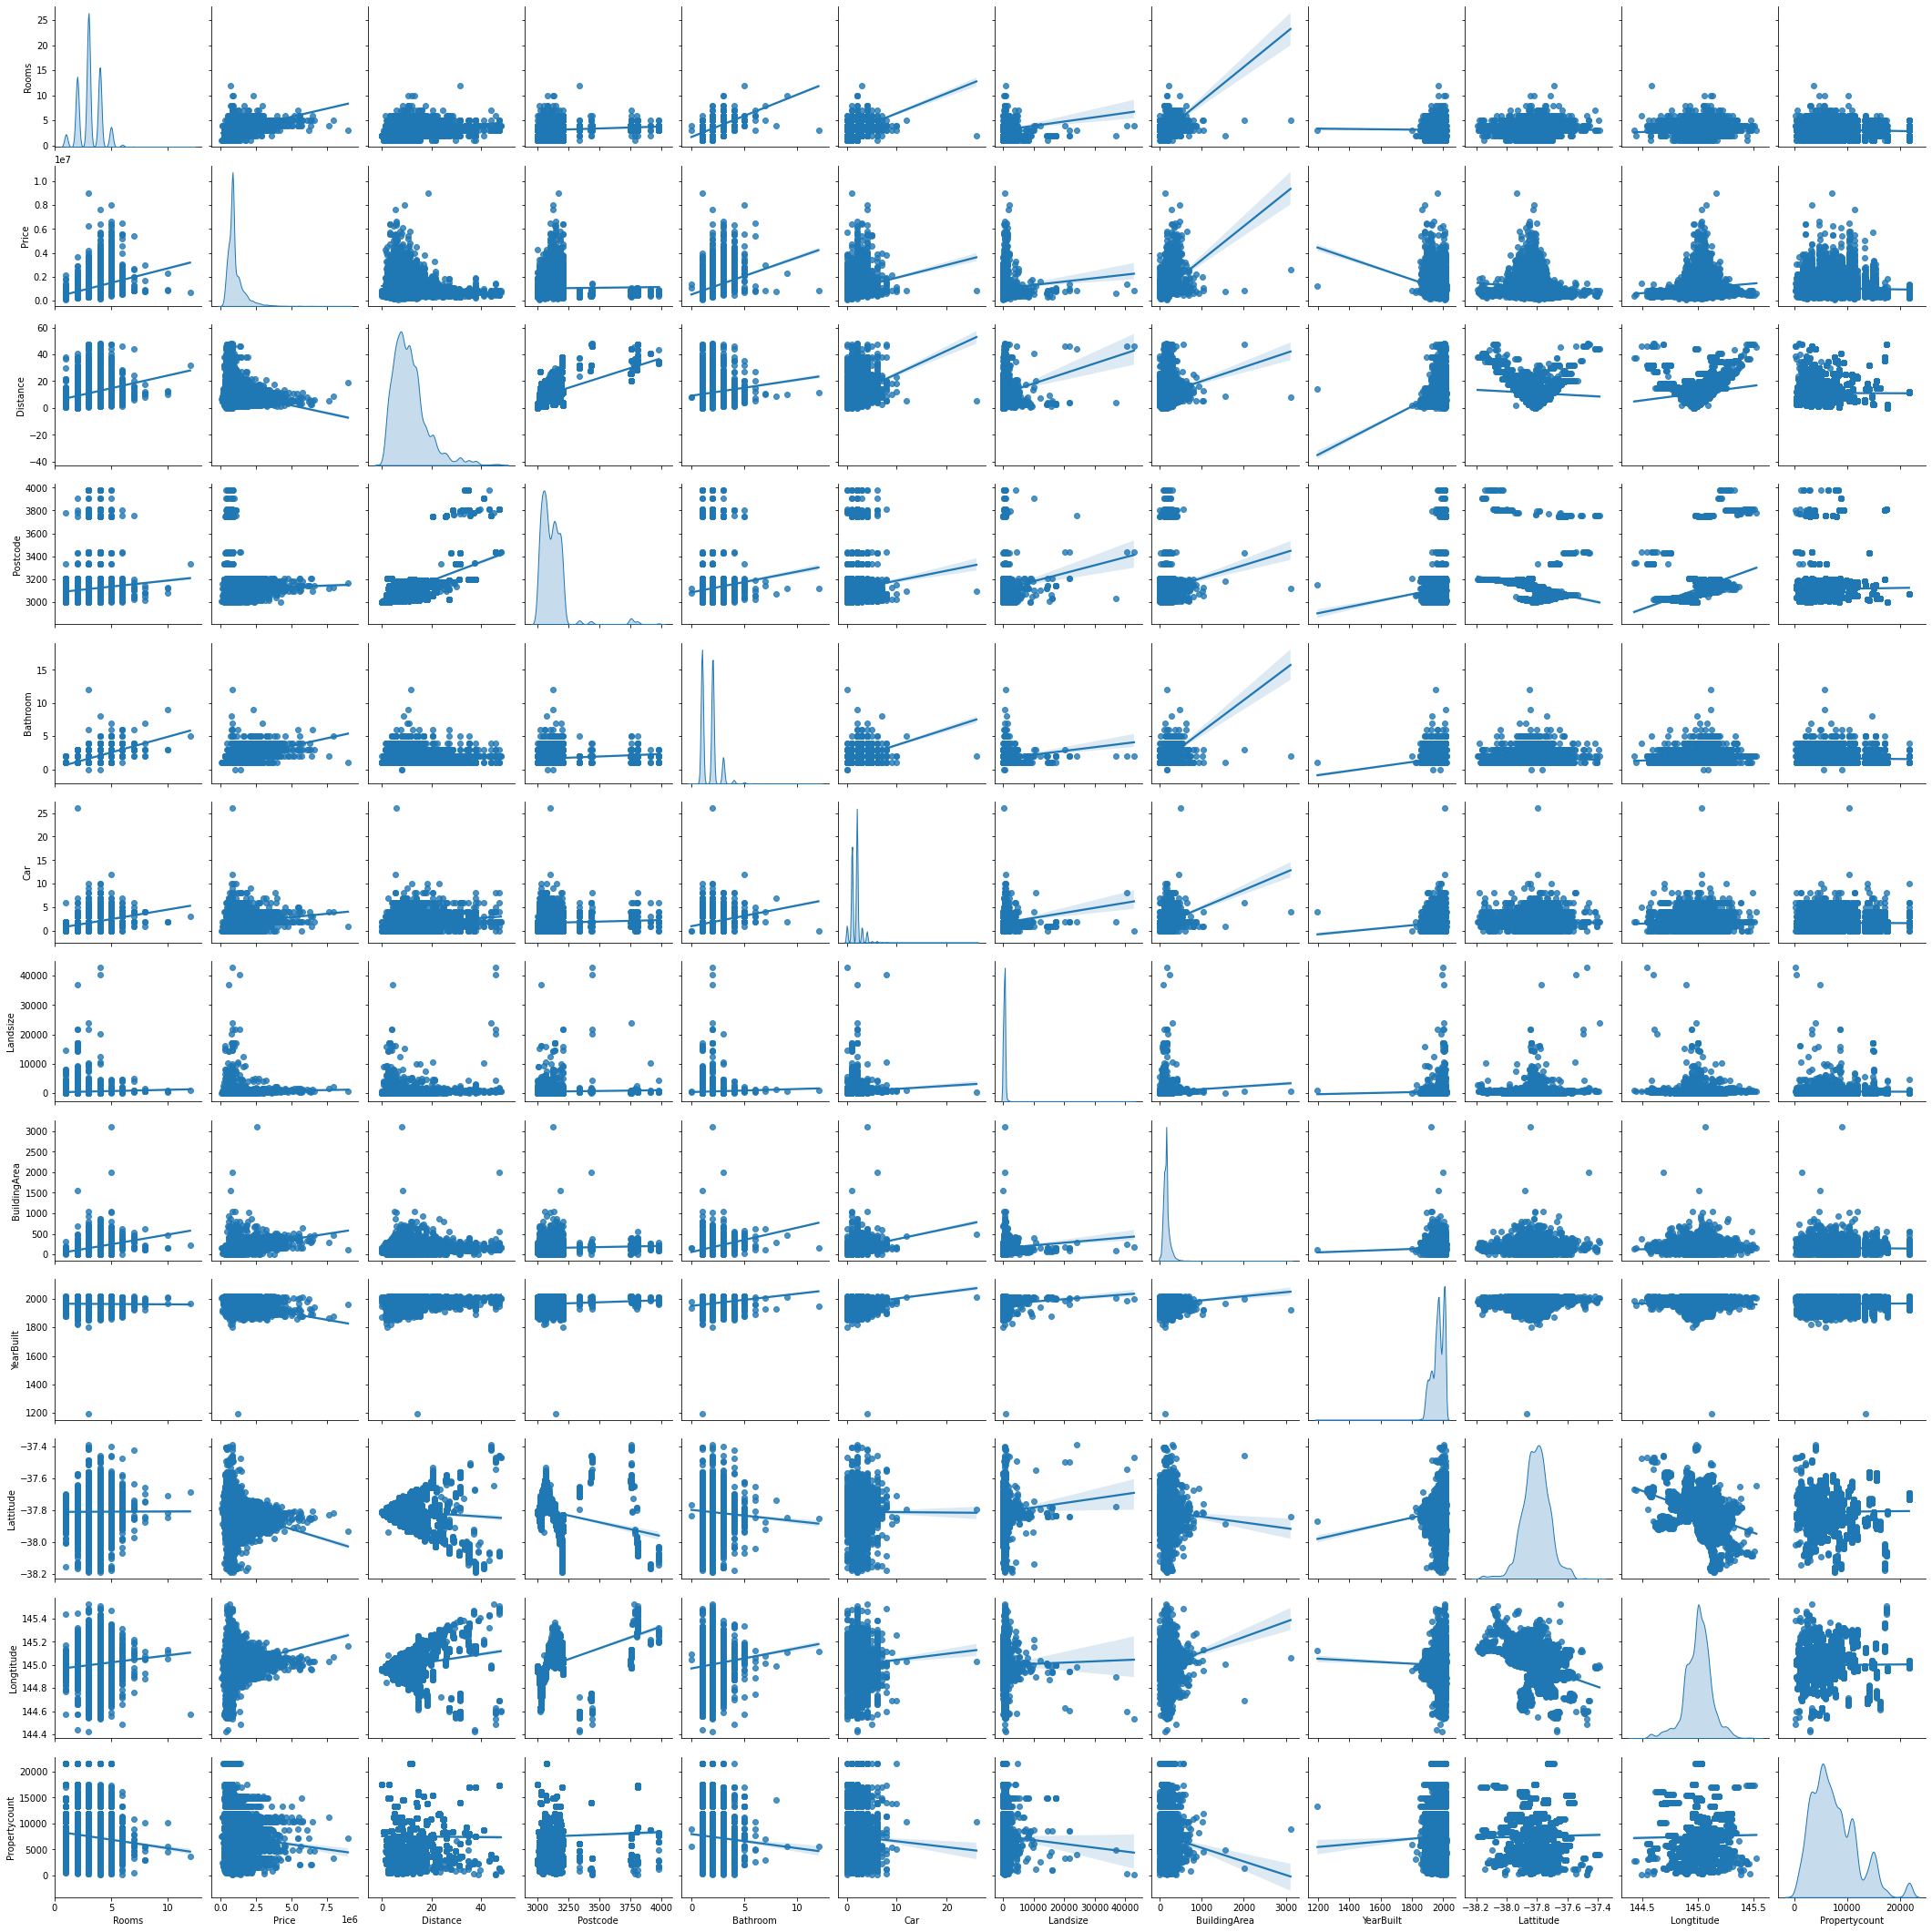

In [149]:
plt.figure(figsize=(15,8)) #Creating a new figure with given width and height in the figsize parameter
sns.pairplot(data, kind='reg', diag_kind='kde') # Plotting multiple pairwise bivariate distributions in our dataframe with kde plots for the diagonal and regreesion plots for the remaining

From the above plot we can observe that -
Distributions of Rooms, Price, Distance, Postcode, Bathroom, Car, Landsize, BuildingArea are extremely right skewed or Positively skewed

Distribution of YearBuilt is left Skewed, meaning lots of houses are built in the 21st century.

From the regression plots against the target Variable Price, we can observe that -

Price of the house increased with increase in number of rooms, number of bathrooms, number of car spots, landsize (albiet with less slope), building area (exponentially)

Price decreased with increase in Distance from CBD. 

Price shows negative relationship with Yearbuilt which is probably due to the outliers.


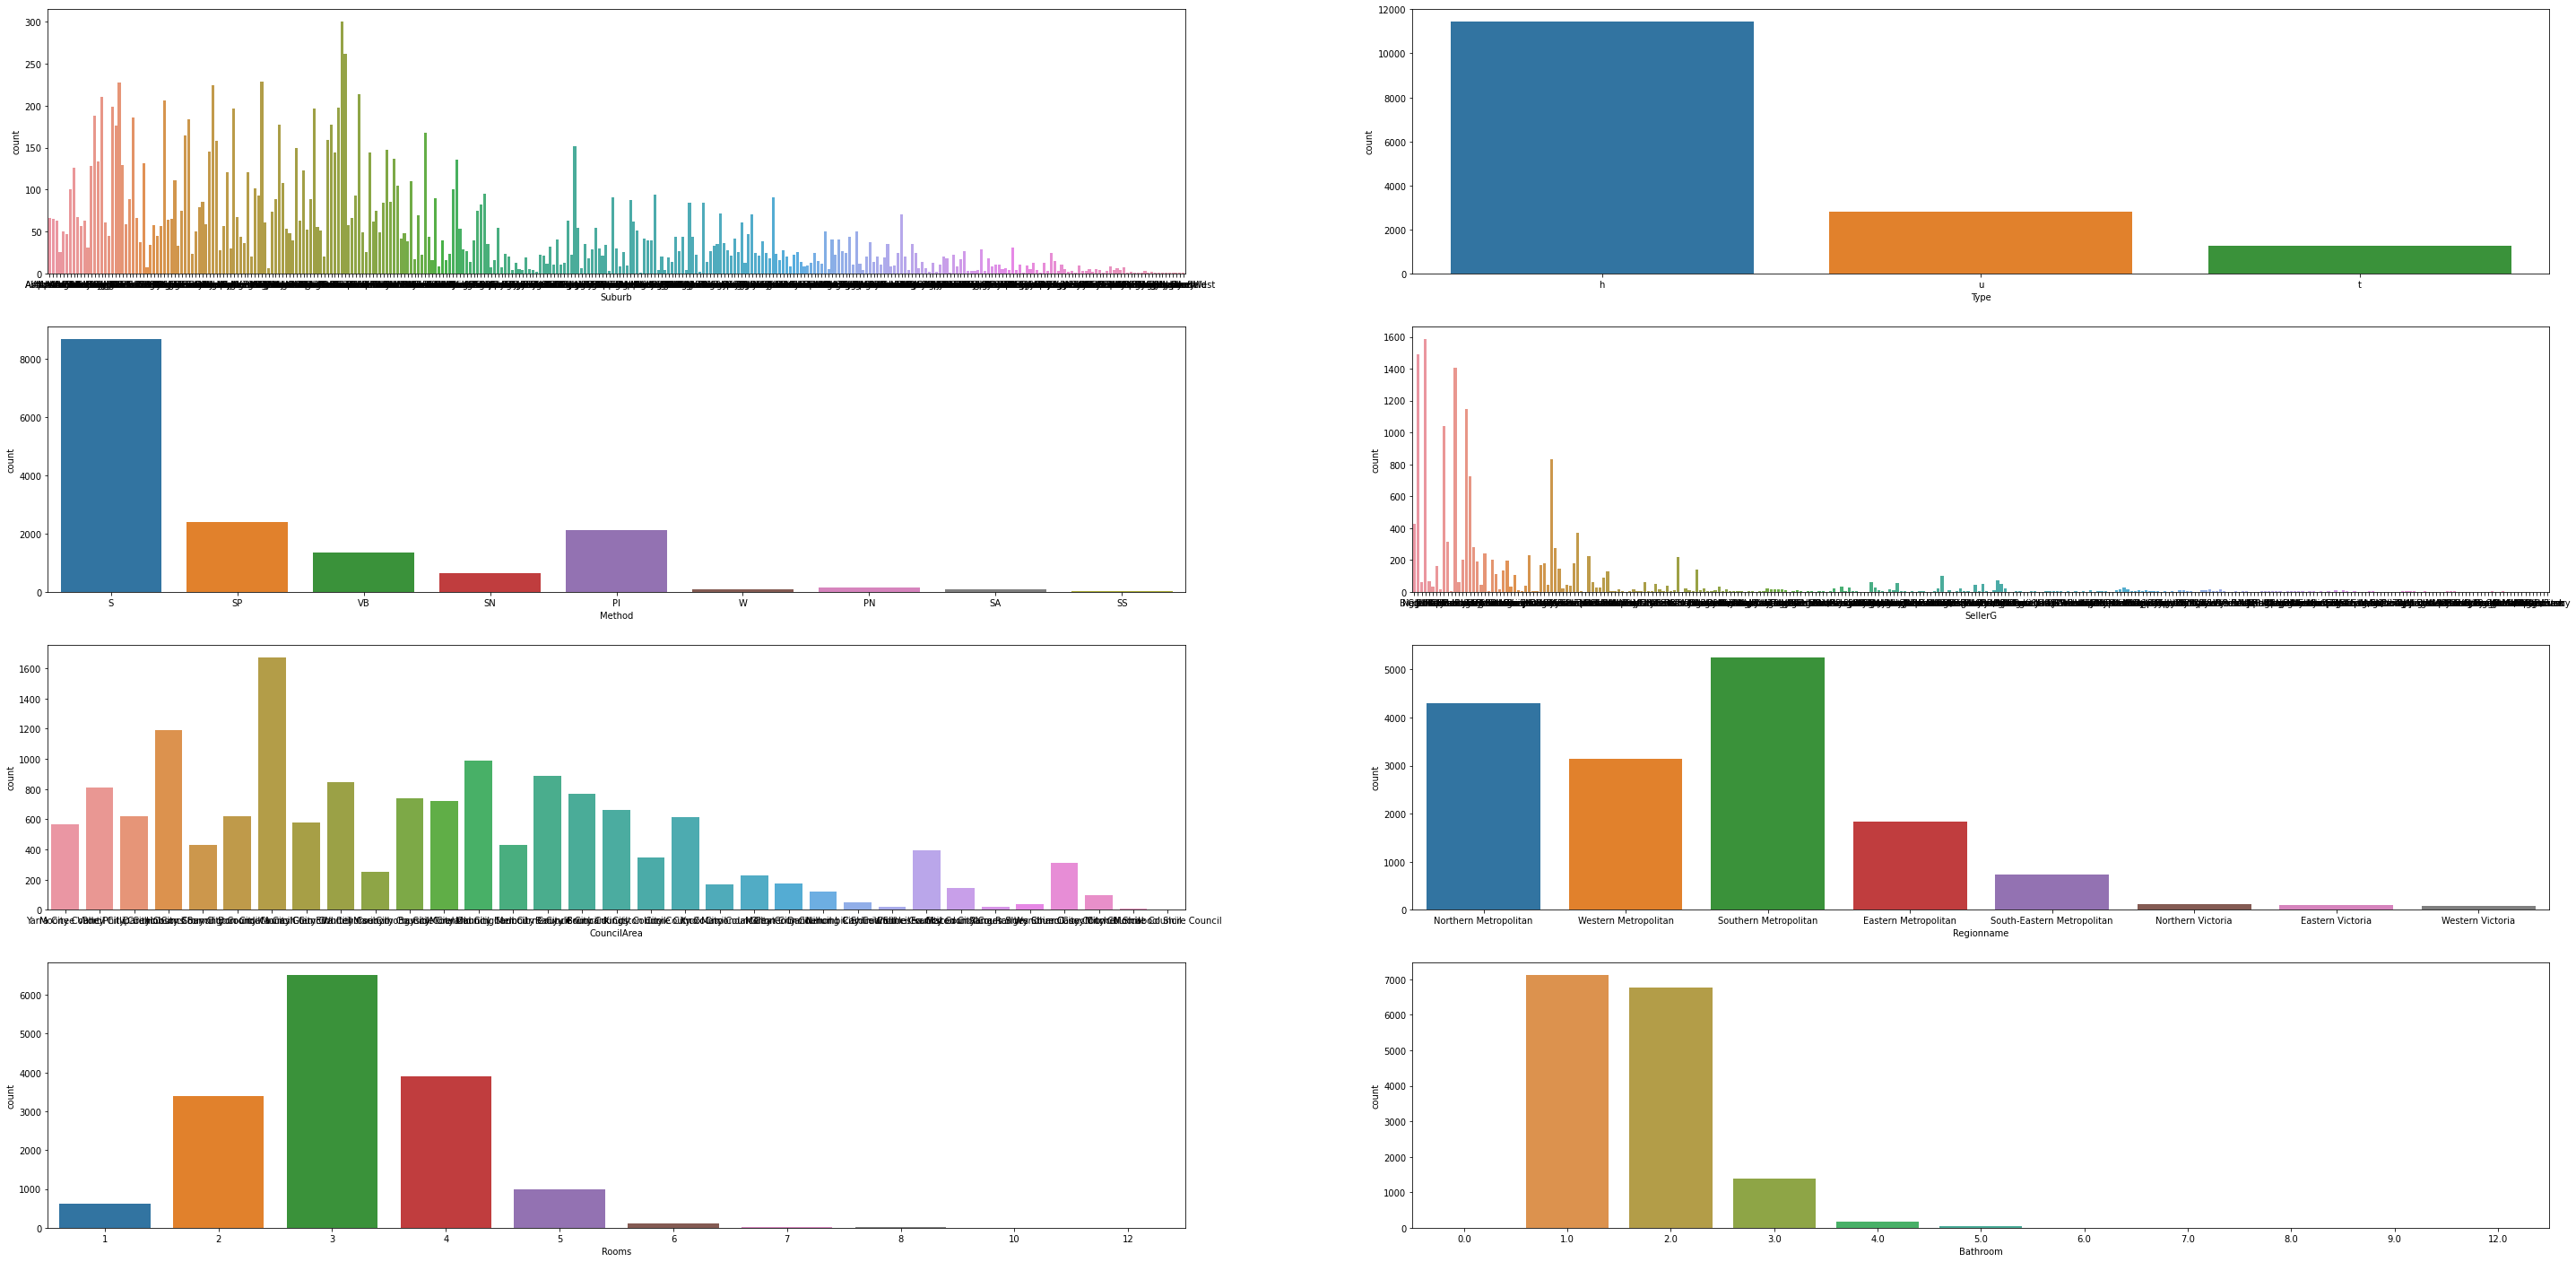

In [150]:
fig,ax = plt.subplots(4,2,figsize=(50,25))
#Plotting countplot for for various columns in our data
sns.countplot(data = data,x='Suburb',ax=ax[0][0])
sns.countplot(data = data,x='Type',ax=ax[0][1])
sns.countplot(data = data,x='Method',ax=ax[1][0])
sns.countplot(data = data,x='SellerG',ax=ax[1][1])
sns.countplot(data = data,x='CouncilArea',ax=ax[2][0])
sns.countplot(data = data,x='Regionname',ax=ax[2][1])
sns.countplot(data = data,x='Rooms',ax=ax[3][0])
sns.countplot(data = data,x='Bathroom',ax=ax[3][1])


From above we can observe that -
The real estate type with highest count is type h which includes house,cottage,villa, semi,terrace.

Highest number of properties are sold and lest of them are SS - sold after auction but price not disclosed.

Most number of properties are found in Southern Metropolitan followed by Northern with least being Western Victoria.

High Number of properties have 3 Rooms. While 1 Bathroom is most found in  the houses.

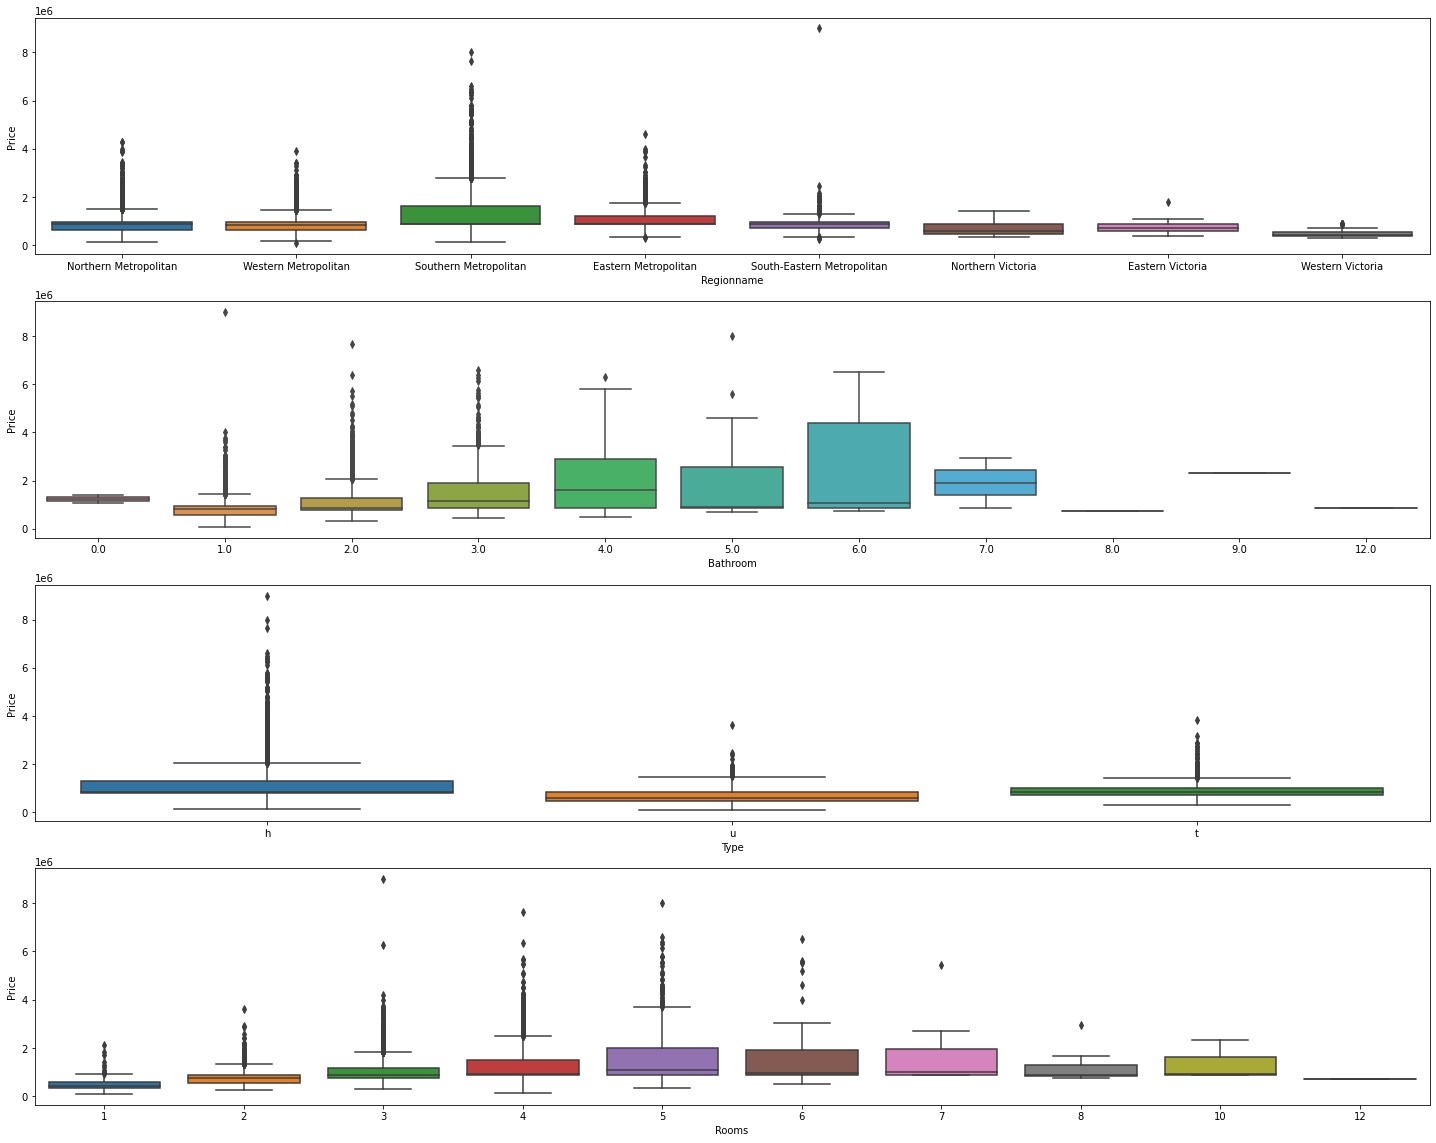

In [151]:
fig, ax = plt.subplots(4,1,figsize=(25,20))
#Plotting boxplot for for various columns in our data
sns.boxplot(data=data, x='Regionname', y='Price', ax=ax[0])
sns.boxplot(data=data, x='Bathroom', y='Price', ax= ax[1])
sns.boxplot(data=data, x='Type', y='Price', ax= ax[2])
sns.boxplot(data=data, x='Rooms', y='Price', ax= ax[3])

From the above boxplots we can observe that -

Prices in the Southern Metropolitan are usually higher than other regions. While properties in Western Visctoria is the least pricier. South-Eastern Metropolitan has the highest price for a property and it is an outlier.

Properties with six bathrooms has the highest variance in prices.

Real estate of type H has higher median price than the other types and also has a lot of outliers.

Properties with 5 rooms have higher median price than others. A property with 3 Rooms has the highest price which also happensto be an outlier.

### **5.Feature Engineering and Encoding**

Let's first select which variables are required for encoding.

Categorical variables we have are - 'Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'.
Numeric Variables - Lattitude and Longtitiude and Postcode can also be considered.

Let's find how many levels each of these variables have.

In [152]:
print("Suburb Value Counts")
print(data.Suburb.value_counts()) # Checking the unique values in Suburb variable

Suburb Value Counts
Reservoir             300
Richmond              262
Kew                   228
Brunswick             227
Glen Iris             224
                     ... 
Healesville             1
Clyde North             1
Beaconsfield Upper      1
Wonga Park              1
The Basin               1
Name: Suburb, Length: 327, dtype: int64


In [153]:
print("Address Value Counts")
print(data.Address.value_counts()) # Checking the unique values in Address variable

Address Value Counts
25 William St       4
38 Lily St          3
1/1 Clarendon St    3
39 Moore St         3
3 Donald St         3
                   ..
11 Taberer Ct       1
17/6 Rosamond Rd    1
19 Pixel Cct        1
1/6 Jepson St       1
1 Clarence St       1
Name: Address, Length: 15252, dtype: int64


Address are unique to each property and hence won't have any influence on our target variable - Price. So Address column can be dropped.

In [154]:
print("Type Value Counts")
print(data.Type.value_counts()) # Checking the unique values in Type variable

Type Value Counts
h    11449
u     2821
t     1271
Name: Type, dtype: int64


In [155]:
print("Method Value Counts")
print(data.Method.value_counts())  # Checking the unique values in Method variable

Method Value Counts
S     8681
SP    2410
PI    2125
VB    1352
SN     640
PN     146
SA      95
W       82
SS      10
Name: Method, dtype: int64


In [156]:
print("SellerG Value Counts")
print(data.SellerG.value_counts()) # Checking the unique values in SellerG variable

SellerG Value Counts
Jellis             1584
Nelson             1493
Barry              1405
hockingstuart      1145
Marshall           1038
                   ... 
Harcourts/Barry       1
Craig                 1
SN                    1
Xynergy               1
Victory               1
Name: SellerG, Length: 306, dtype: int64


In [157]:
print("CouncilArea Value Counts")
print(data.CouncilArea.value_counts()) # Checking the unique values in CouncilArea variable

CouncilArea Value Counts
Boroondara City Council           1673
Darebin City Council              1190
Moreland City Council              990
Melbourne City Council             889
Glen Eira City Council             848
Moonee Valley City Council         810
Banyule City Council               771
Maribyrnong City Council           741
Bayside City Council               719
Brimbank City Council              659
Stonnington City Council           623
Port Phillip City Council          621
Hume City Council                  616
Monash City Council                579
Yarra City Council                 567
Manningham City Council            432
Hobsons Bay City Council           429
Whittlesea City Council            397
Kingston City Council              349
Wyndham City Council               310
Whitehorse City Council            252
Maroondah City Council             229
Melton City Council                177
Knox City Council                  171
Frankston City Council             144


In [158]:
print("Regionname Value Counts")
print(data.Regionname.value_counts()) # Checking the unique values in CouncilArea variable

Regionname Value Counts
Southern Metropolitan         5253
Northern Metropolitan         4292
Western Metropolitan          3146
Eastern Metropolitan          1834
South-Eastern Metropolitan     729
Northern Victoria              110
Eastern Victoria               103
Western Victoria                74
Name: Regionname, dtype: int64


Suburb has 327 levels, Seller has 306 levels, while CouncilArea has 33 levels which are too many levels to encode and hence they should be dropped.

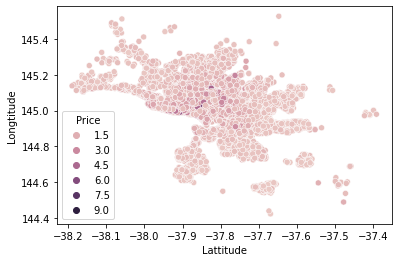

In [159]:
sns.scatterplot(data=data, x='Lattitude', y='Longtitude', hue='Price') #Plotting a scatterplot to check how price varies

From the above plot we can see that Lattitude and Longtitude doesn't seem to influence the Price as most of prices are uniform or does not have much variation with respect to the Longtitude and Lattitude variables. So we can drop these two columns.

Converting the Date values into datetime format and replacing the values with just the year as the exact date and month of when the property is sold doesn't matter much. Also, having just the year makes it easier to normalize it.

In [160]:
yearSold_df = pd.to_datetime(data.Date) #Converting values in the Date column to daatetime format
yearSold_df = yearSold_df.dt.year # Extracting only the year
data['Date'] = yearSold_df
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016,2.5,3067.0,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017,2.5,3067.0,2.0,0.0,134.0,150.0000,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016,2.5,3067.0,1.0,2.0,120.0,142.0000,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,870000.0,SN,Nelson,2016,2.5,3067.0,2.0,2.0,400.0,220.0000,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,870000.0,S,Biggin,2016,2.5,3067.0,1.0,2.0,201.0,160.2564,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018,25.5,3750.0,2.0,2.0,404.0,158.0000,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34850,Wollert,15 Rockgarden Wy,3,h,870000.0,SP,LJ,2018,25.5,3750.0,2.0,2.0,268.0,135.0000,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018,6.3,3013.0,2.0,1.0,98.0,104.0000,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018,6.3,3013.0,1.0,2.0,220.0,120.0000,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [161]:
data.drop(columns=['Suburb','Address','SellerG','CouncilArea','Lattitude','Longtitude'], inplace=True) #Dropping several columns and updating the dataframe

Creating Dummy Variables

In [162]:
data_enc = pd.concat([data, pd.get_dummies(data.Type), pd.get_dummies(data.Method), pd.get_dummies(data.Regionname)],axis=1) #Coverting categorical data in several columns into dummy variables and concatenating them
data_enc
data_enc.drop(columns=['Type','Method','Regionname'], inplace=True) # Dropping the original columns after making their dummy variables

In [163]:
data_enc.head()

,Rooms,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
2,2,1035000.0,2016,2.5,3067.0,1.0,0.0,156.0,79.0000,1900.0,4019.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2017,2.5,3067.0,2.0,0.0,134.0,150.0000,1900.0,4019.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2016,2.5,3067.0,1.0,2.0,120.0,142.0000,2014.0,4019.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
7,4,870000.0,2016,2.5,3067.0,2.0,2.0,400.0,220.0000,2006.0,4019.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,2,870000.0,2016,2.5,3067.0,1.0,2.0,201.0,160.2564,1900.0,4019.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


***Which independent variables are useful to predict a target (dependent variable)? <br>
Which predictor variables are the most important?*** <br>

Performing f_regression and mutual_info_regression using SelectKBest function.


In [164]:
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest #Importing different classes in sklearn.feature_selection for feature selection
features = data_enc.drop(columns=['Price']) # Droping the target variable to get only features
target = data_enc.Price 

As our target variable - Price is a continuous value we can perform f_regression and mutual_info_regression tests for selecting the best features.

**F_regression**: It is a univariate **linear** regression test for testing the individual effect of each of the feature against the target.

In [165]:
bestfeatures = SelectKBest(score_func=f_regression,k="all") #Select features with highest scores using f_regression function
fit = bestfeatures.fit(features, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.sort_values(ascending=False, by= ['Score']))

                         Specs        Score
0                        Rooms  2938.825856
7                 BuildingArea  2728.248784
4                     Bathroom  2619.045688
27       Southern Metropolitan  1619.011800
12                           u  1592.602955
10                           h  1586.933713
8                    YearBuilt  1289.701232
2                     Distance   634.431541
5                          Car   504.180647
24       Northern Metropolitan   409.960792
28        Western Metropolitan   308.423089
20                          VB   133.820744
18                          SP   129.487953
29            Western Victoria    57.544826
11                           t    56.853245
17                          SN    48.634557
25           Northern Victoria    44.896682
26  South-Eastern Metropolitan    44.868725
9                Propertycount    44.469430
6                     Landsize    35.639273
23            Eastern Victoria    24.963641
13                          PI  

As f_regression captures only linear dependency, We also perform mutual_info_regression, which captures any kind of relationship.<br><br>
**mutual_info_regression**: Estimates mutual information for a continuous target variable, here Price.It measures the dependency between the features and target

In [166]:
bestfeatures_mi = SelectKBest(score_func=mutual_info_regression, k="all")
fit_mi = bestfeatures_mi.fit(features, target)
dfscores_mi = pd.DataFrame(fit_mi.scores_)
dfcolumns_mi = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores_mi.sort_values(ascending=False, by= ['Score']))

                         Specs     Score
3                     Postcode  0.294894
7                 BuildingArea  0.202945
2                     Distance  0.201274
9                Propertycount  0.192667
0                        Rooms  0.162592
8                    YearBuilt  0.123577
4                     Bathroom  0.107079
6                     Landsize  0.102308
12                           u  0.100236
15                           S  0.098072
10                           h  0.091771
17                          SN  0.069154
27       Southern Metropolitan  0.068850
5                          Car  0.061758
20                          VB  0.058767
13                          PI  0.020630
22        Eastern Metropolitan  0.018591
24       Northern Metropolitan  0.017680
18                          SP  0.017656
28        Western Metropolitan  0.017648
26  South-Eastern Metropolitan  0.015888
25           Northern Victoria  0.010318
21                           W  0.009901
11              

Top 5 Features from f_regression: Rooms, BuildingArea,Bathroom, Southern Metropolitan, u

Top 5 Features from mutual_info_regression: Postcode, Distance, BuildingArea, PropertyCount, Rooms

Observing both we can conclude that, Rooms and BuildingArea are the most important features to predict our target variable i.e. Price.

### **5.1 Normalizing the Data**

As we have features with different ranges, we will normalize them and get them all in the range of 0 to 1. We also do this for better interpretability and to avoid only the features with large values to influence the model. So we bring them all to the same scale.


In [167]:
from sklearn import preprocessing
x = data_enc.iloc[:,0:11].values.astype(float) # Selecting all the data to be normalized and converting the values to float to apply the scaler
min_max_scaler = preprocessing.MinMaxScaler() # Creating instance of MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x) #MinMaxScaler scales and translates each feature in x, such that it is in the given range. Here 0 to 1 is the range, which is default.
norm_cols = data_enc.iloc[:,0:11].columns #Normalized Columns
pd.DataFrame(x_scaled) 
data_norm = pd.DataFrame(x_scaled, columns=norm_cols)  # Features and data for which normalization is applied
data_onlyenc = data_enc.iloc[:,12:] #Features and data for which encoding is done
data_onlyenc = data_onlyenc.reset_index(drop=True) #Resetting the index
finaldata = pd.concat([data_norm,data_onlyenc],axis=1) #Concatenating our normalized features and encoded features in the finaldata dataframe.
finaldata

,Rooms,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,t,u,PI,PN,S,SA,SN,SP,SS,VB,W,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,0.090909,0.106562,0.0,0.051975,0.068507,0.083333,0.000000,0.003645,0.025386,0.855407,0.180754,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.181818,0.154795,0.5,0.051975,0.068507,0.166667,0.000000,0.003131,0.048201,0.855407,0.180754,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0.272727,0.169938,0.0,0.051975,0.068507,0.083333,0.076923,0.002804,0.045630,0.993925,0.180754,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.272727,0.088054,0.0,0.051975,0.068507,0.166667,0.076923,0.009346,0.070694,0.984204,0.180754,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0.090909,0.088054,0.0,0.051975,0.068507,0.083333,0.076923,0.004696,0.051496,0.855407,0.180754,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15536,0.181818,0.054403,1.0,0.530146,0.766871,0.166667,0.076923,0.009439,0.050771,0.991495,0.130617,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
15537,0.181818,0.088054,1.0,0.530146,0.766871,0.166667,0.076923,0.006262,0.043380,0.996355,0.130617,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
15538,0.090909,0.090073,1.0,0.130977,0.013292,0.166667,0.038462,0.002290,0.033419,0.998785,0.298034,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15539,0.090909,0.069546,1.0,0.130977,0.013292,0.083333,0.076923,0.005140,0.038560,0.976914,0.298034,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### **6. Test and Train Split**

We divide data into Test and Train.
Training data is used to train our regression model and the test data is then used to evaluate the performance of the model.

**Test Split - 33% & random_state=3**

In [168]:
from sklearn.model_selection import train_test_split 
features_norm = finaldata.drop(columns=['Price'])
target_norm = finaldata.Price
X_train, X_test, y_train, y_test = train_test_split(features_norm, target_norm, test_size=0.33, random_state=3)

In [169]:
print("X_train:")
print(pd.DataFrame(X_train))
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)

X_train:
          Rooms  Date  ...  Western Metropolitan  Western Victoria
10684  0.090909   0.5  ...                     0                 0
1146   0.000000   0.0  ...                     0                 0
6697   0.181818   0.5  ...                     0                 0
1158   0.000000   0.0  ...                     0                 0
4200   0.181818   0.0  ...                     0                 0
...         ...   ...  ...                   ...               ...
15288  0.272727   1.0  ...                     0                 0
9859   0.090909   0.5  ...                     0                 0
11513  0.181818   0.5  ...                     0                 0
1688   0.090909   0.0  ...                     0                 0
5994   0.090909   0.0  ...                     0                 0

[10412 rows x 29 columns]
X_test:
          Rooms  Date  ...  Western Metropolitan  Western Victoria
11820  0.272727   0.5  ...                     0                 0
7911   0.181818   

### **6.1 Comparing Test and Train sets**
 ***Do the training and test sets have the same data?***

0.181818    2152
0.272727    1284
0.090909    1092
0.363636     345
0.000000     212
0.454545      34
0.545455       5
0.636364       4
0.818182       1
Name: Rooms, dtype: int64
0.181818    4352
0.272727    2627
0.090909    2307
0.363636     633
0.000000     404
0.454545      71
0.545455      12
0.636364       3
0.818182       2
1.000000       1
Name: Rooms, dtype: int64


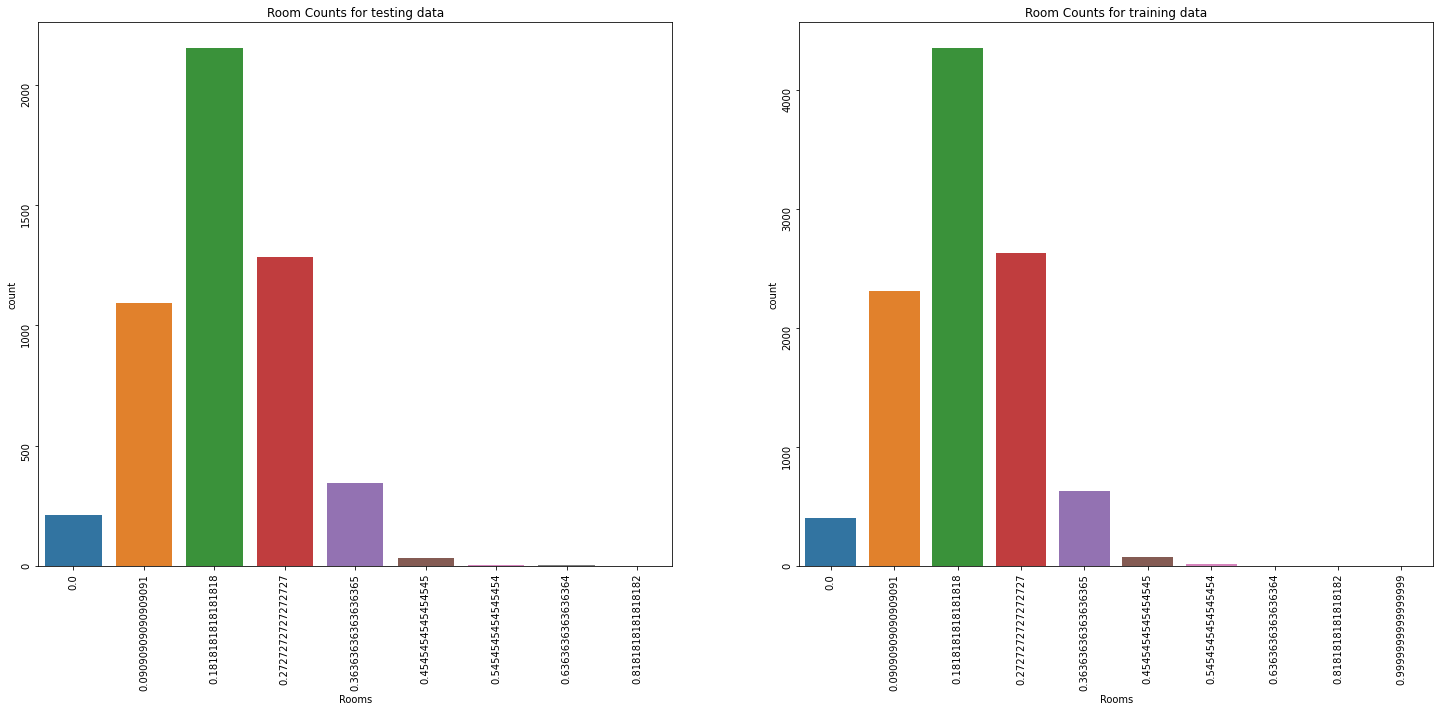

In [170]:
fig, ax = plt.subplots(1,2,figsize=(25,10))

sns.countplot(data=X_test, x='Rooms', ax=ax[0]).set(title='Room Counts for testing data')
sns.countplot(data=X_train, x='Rooms', ax=ax[1]).set(title='Room Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90) # Rotating the ticks for better visualization
print(X_test.Rooms.value_counts())
print(X_train.Rooms.value_counts())

We can observe that test set has one missing Rooms category but the training set has all categories of Rooms, so this won't cause a problem to model performance.

0.083333    2370
0.166667    2201
0.250000     474
0.333333      56
0.416667      21
0.500000       3
0.583333       2
0.666667       1
0.000000       1
Name: Bathroom, dtype: int64
0.083333    4742
0.166667    4579
0.250000     922
0.333333     128
0.416667      35
0.500000       3
0.000000       1
0.750000       1
1.000000       1
Name: Bathroom, dtype: int64
0.083333    7112
0.166667    6780
0.250000    1396
0.333333     184
0.416667      56
0.500000       6
0.583333       2
0.000000       2
0.666667       1
0.750000       1
1.000000       1
Name: Bathroom, dtype: int64


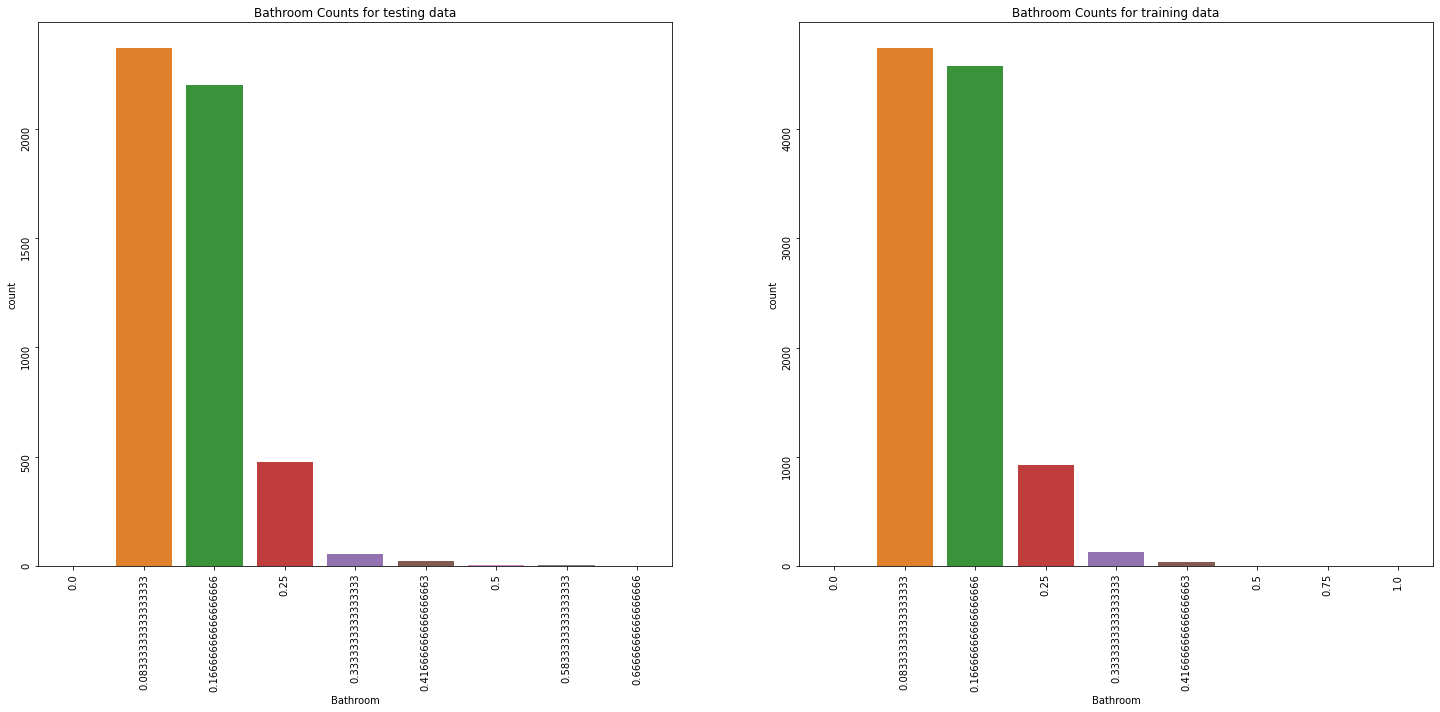

In [171]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test, x='Bathroom', ax=ax[0]).set(title='Bathroom Counts for testing data')
sns.countplot(data=X_train, x='Bathroom', ax=ax[1]).set(title='Bathroom Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test.Bathroom.value_counts())
print(X_train.Bathroom.value_counts())
print(features_norm.Bathroom.value_counts())

We can observe that training set has two missing Bathroom categories. This will effect the model performance while testing.

0.076923    2395
0.038462    1865
0.000000     309
0.115385     295
0.153846     183
0.230769      36
0.192308      33
0.307692       7
0.269231       5
0.346154       1
Name: Car, dtype: int64
0.076923    4916
0.038462    3721
0.000000     632
0.115385     586
0.153846     435
0.230769      52
0.192308      48
0.269231       9
0.307692       7
0.384615       3
0.461538       1
0.346154       1
1.000000       1
Name: Car, dtype: int64
0.076923    7311
0.038462    5586
0.000000     941
0.115385     881
0.153846     618
0.230769      88
0.192308      81
0.269231      14
0.307692      14
0.384615       3
0.346154       2
0.461538       1
1.000000       1
Name: Car, dtype: int64


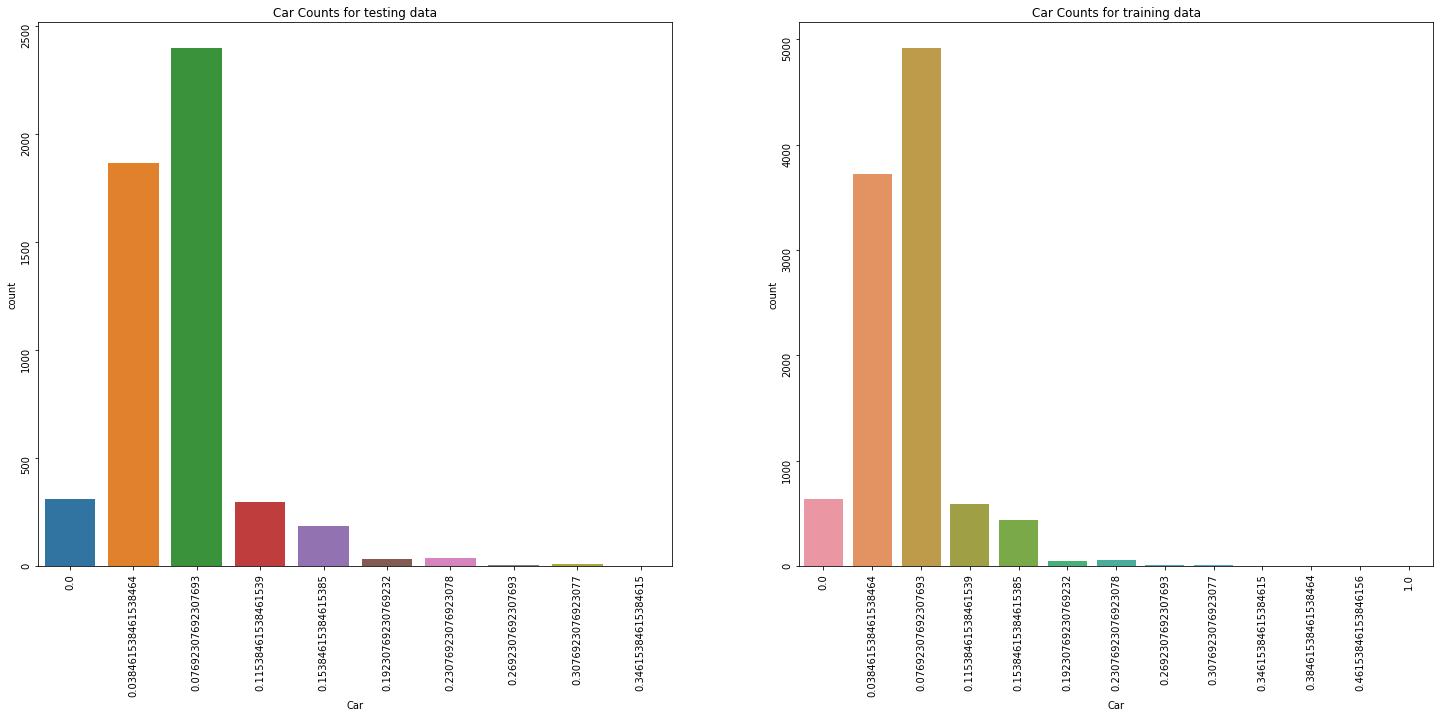

In [172]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test, x='Car', ax=ax[0]).set(title='Car Counts for testing data')
sns.countplot(data=X_train, x='Car', ax=ax[1]).set(title='Car Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test.Car.value_counts())
print(X_train.Car.value_counts())
print(features_norm.Car.value_counts())

 From above, we can see that training set has one missing Car category. This will effect the model performance while testing.

[Text(0.5, 1.0, 'Date Counts for training data')]

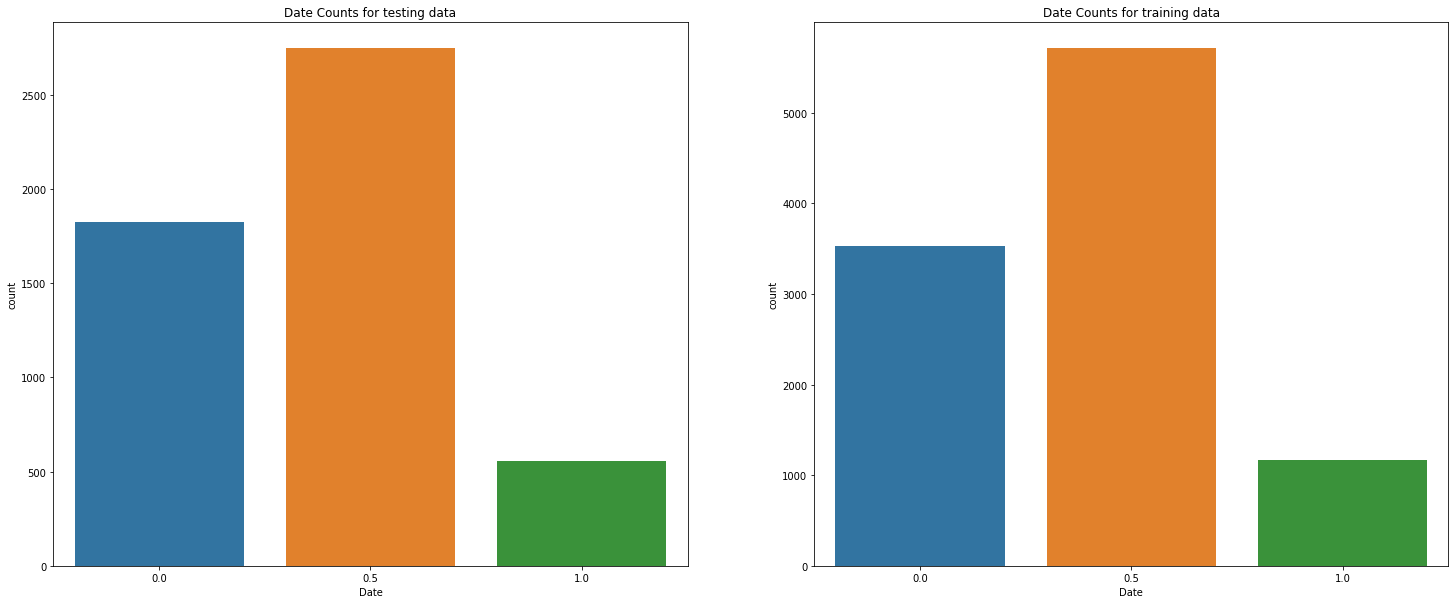

In [173]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test, x='Date', ax=ax[0]).set(title='Date Counts for testing data')
sns.countplot(data=X_train, x='Date', ax=ax[1]).set(title='Date Counts for training data')

From above plots, we can see that all Date values are represented in both train and test data.

In [174]:
for column in data_onlyenc.columns:
  print("Value counts for feature" + " " +column + " " + "in training data")
  print(X_train[column].value_counts())
  print("Value counts for feature" + " " +column + " " + "in test data")
  print(X_test[column].value_counts())
  print("______")
  print("")

Value counts for feature t in training data
0    9573
1     839
Name: t, dtype: int64
Value counts for feature t in test data
0    4697
1     432
Name: t, dtype: int64
______

Value counts for feature u in training data
0    8514
1    1898
Name: u, dtype: int64
Value counts for feature u in test data
0    4206
1     923
Name: u, dtype: int64
______

Value counts for feature PI in training data
0    8953
1    1459
Name: PI, dtype: int64
Value counts for feature PI in test data
0    4463
1     666
Name: PI, dtype: int64
______

Value counts for feature PN in training data
0    10309
1      103
Name: PN, dtype: int64
Value counts for feature PN in test data
0    5086
1      43
Name: PN, dtype: int64
______

Value counts for feature S in training data
1    5736
0    4676
Name: S, dtype: int64
Value counts for feature S in test data
1    2945
0    2184
Name: S, dtype: int64
______

Value counts for feature SA in training data
0    10352
1       60
Name: SA, dtype: int64
Value counts for fea

From the above value counts of encoded variables, we can say that both test and train data are representative. All the possible values in each variable has been taken into consideration in both testing and training data.

As the Bathroom and Car categories are not representatively split in the training set, I am splitting the data again with a lesser percentage of test data this time.

**Test Split - 20% & random_state=3**

In [175]:
features_norm2 = finaldata.drop(columns=['Price'])
target_norm2 = finaldata.Price
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_norm2, target_norm2, test_size=0.20, random_state=3)

0.181818    1301
0.272727     802
0.090909     669
0.363636     180
0.000000     126
0.454545      23
0.545455       4
0.636364       4
Name: Rooms, dtype: int64
0.181818    5203
0.272727    3109
0.090909    2730
0.363636     798
0.000000     490
0.454545      82
0.545455      13
0.636364       3
0.818182       3
1.000000       1
Name: Rooms, dtype: int64


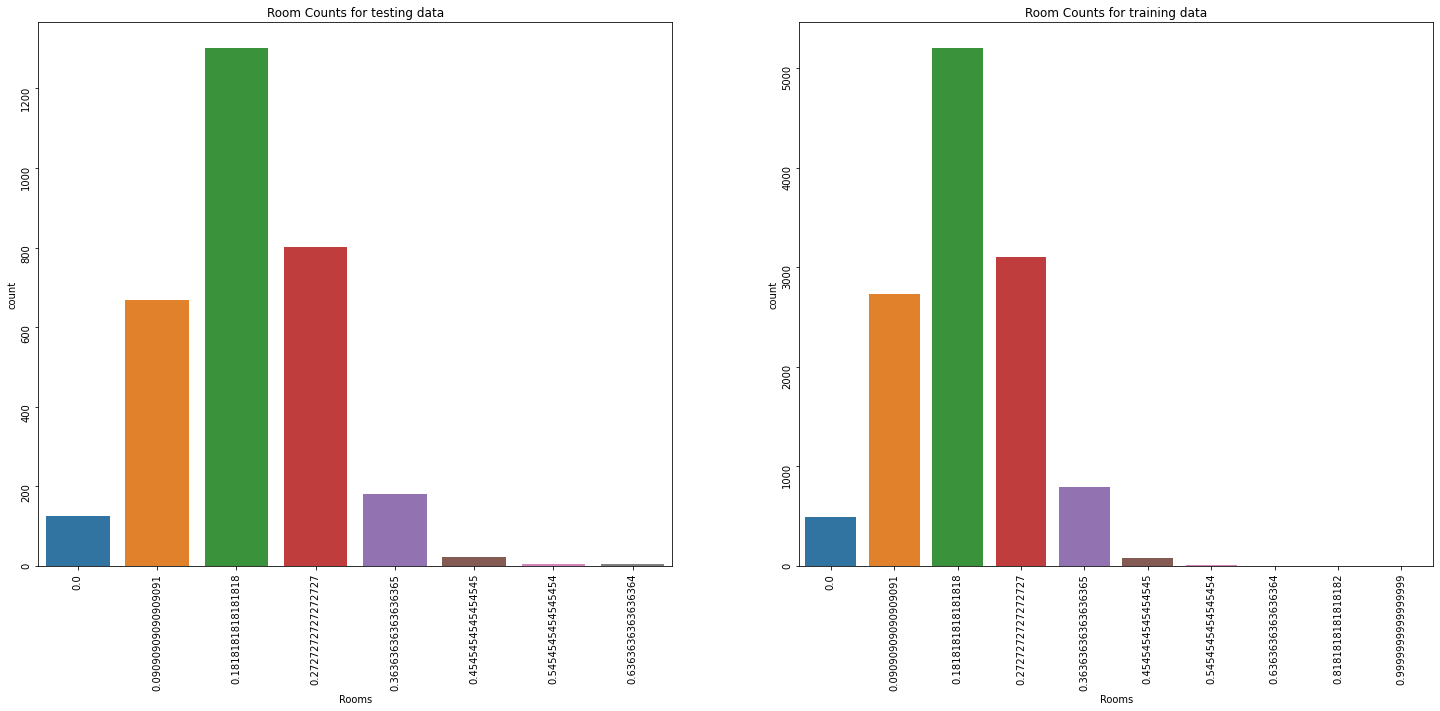

In [176]:
fig, ax = plt.subplots(1,2,figsize=(25,10))

sns.countplot(data=X_test2, x='Rooms', ax=ax[0]).set(title='Room Counts for testing data')
sns.countplot(data=X_train2, x='Rooms', ax=ax[1]).set(title='Room Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test2.Rooms.value_counts())
print(X_train2.Rooms.value_counts())

We can observe from above that categories in the Rooms variable is representatively split again. That is, all categories in the test data are present in the training data.

0.083333    1438
0.166667    1341
0.250000     285
0.333333      33
0.416667      10
0.583333       1
0.666667       1
Name: Bathroom, dtype: int64
0.083333    5674
0.166667    5439
0.250000    1111
0.333333     151
0.416667      46
0.500000       6
0.000000       2
0.583333       1
0.750000       1
1.000000       1
Name: Bathroom, dtype: int64
0.083333    7112
0.166667    6780
0.250000    1396
0.333333     184
0.416667      56
0.500000       6
0.583333       2
0.000000       2
0.666667       1
0.750000       1
1.000000       1
Name: Bathroom, dtype: int64


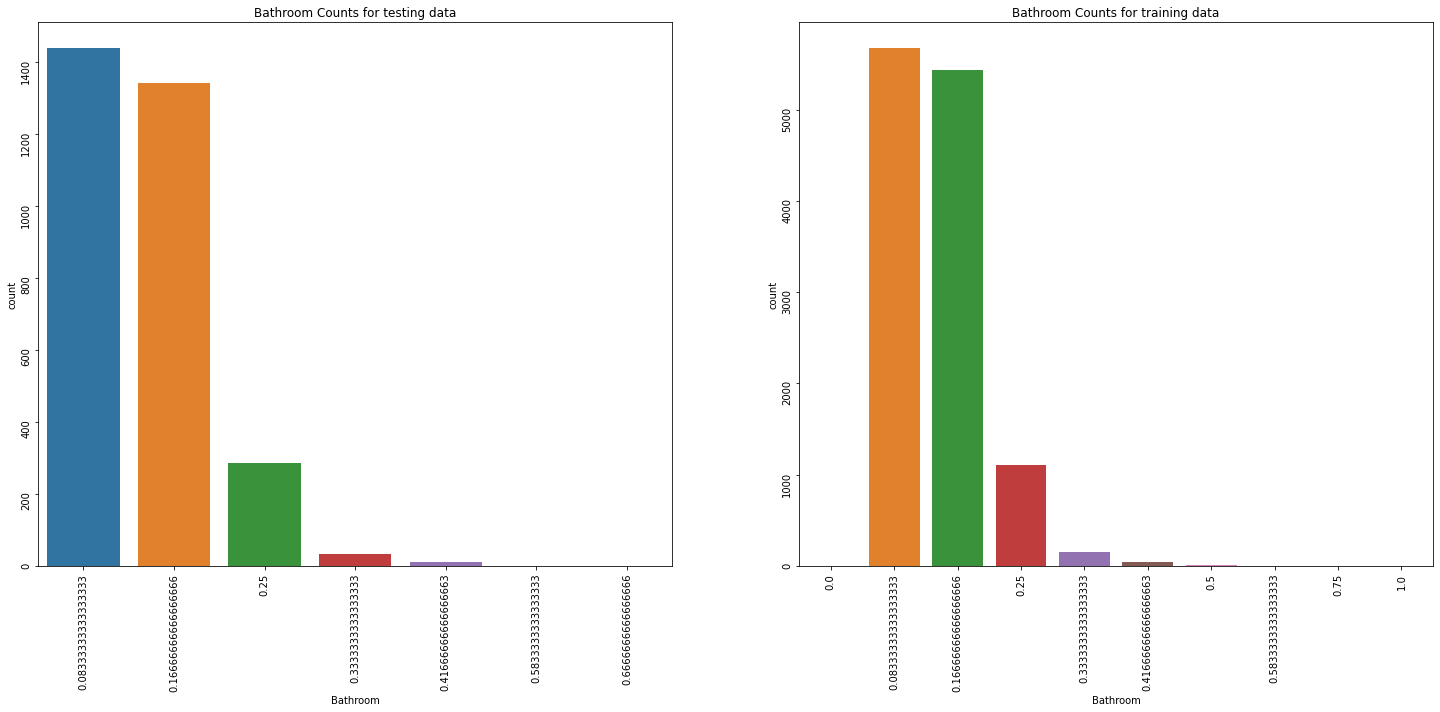

In [177]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test2, x='Bathroom', ax=ax[0]).set(title='Bathroom Counts for testing data')
sns.countplot(data=X_train2, x='Bathroom', ax=ax[1]).set(title='Bathroom Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test2.Bathroom.value_counts())
print(X_train2.Bathroom.value_counts())
print(features_norm.Bathroom.value_counts())

There is one category missing in the training set when compared to test set for Bathroom variable.

0.076923    1472
0.038462    1111
0.115385     181
0.000000     177
0.153846     117
0.230769      21
0.192308      20
0.269231       5
0.307692       5
Name: Car, dtype: int64
0.076923    5839
0.038462    4475
0.000000     764
0.115385     700
0.153846     501
0.230769      67
0.192308      61
0.269231       9
0.307692       9
0.384615       3
0.346154       2
0.461538       1
1.000000       1
Name: Car, dtype: int64
0.076923    7311
0.038462    5586
0.000000     941
0.115385     881
0.153846     618
0.230769      88
0.192308      81
0.269231      14
0.307692      14
0.384615       3
0.346154       2
0.461538       1
1.000000       1
Name: Car, dtype: int64


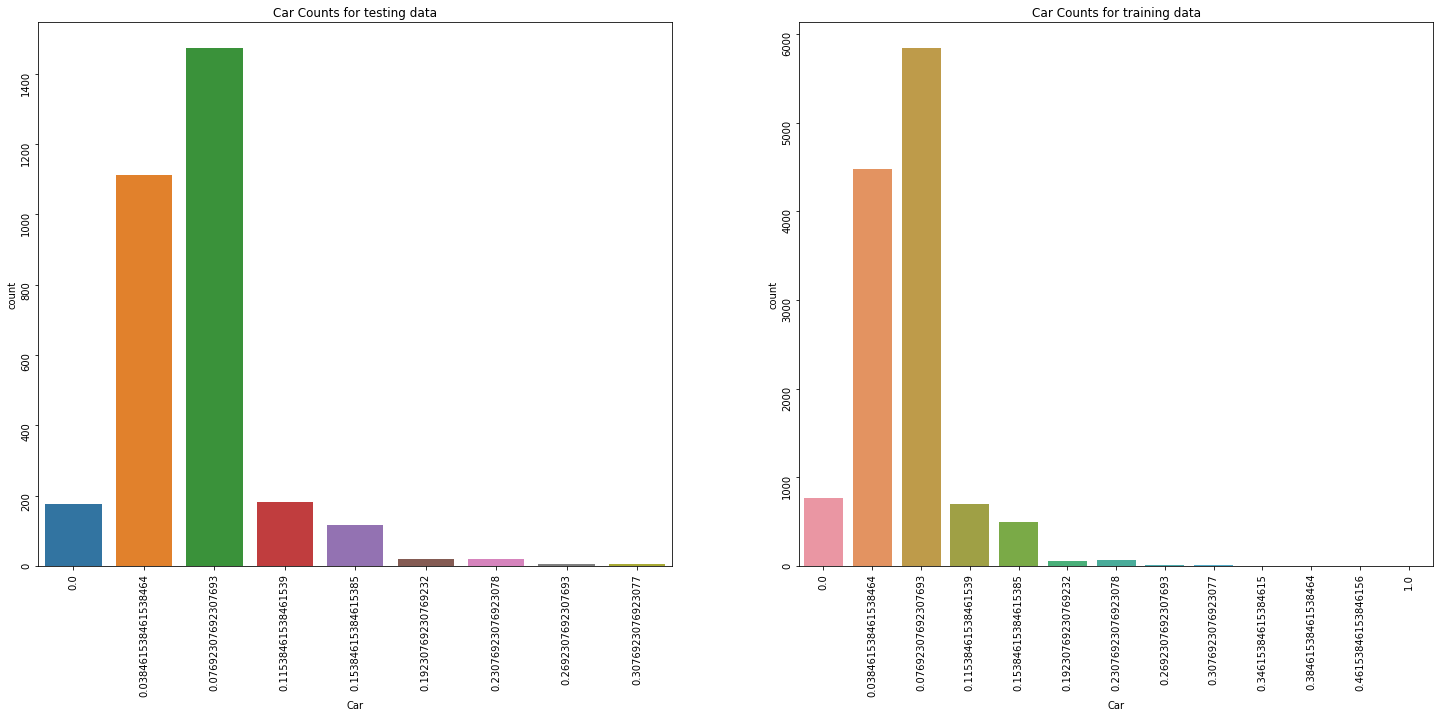

In [178]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test2, x='Car', ax=ax[0]).set(title='Car Counts for testing data')
sns.countplot(data=X_train2, x='Car', ax=ax[1]).set(title='Car Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test2.Car.value_counts())
print(X_train2.Car.value_counts())
print(features_norm.Car.value_counts())

As we can see above, the training set of Car has one missing data when compared to test data.

Now I'll change the random_state to 5 and split the data again, as car and bathrrom variables are not properly split.

**Test Split - 20% & random_state=5**

In [179]:
features_norm3 = finaldata.drop(columns=['Price'])
target_norm3 = finaldata.Price
X_train3, X_test3, y_train3, y_test3 = train_test_split(features_norm3, target_norm3, test_size=0.20, random_state=5)

0.076923    1472
0.038462    1116
0.000000     188
0.115385     174
0.153846     114
0.192308      22
0.230769      17
0.307692       3
0.269231       1
0.384615       1
0.346154       1
Name: Car, dtype: int64
0.076923    5839
0.038462    4470
0.000000     753
0.115385     707
0.153846     504
0.230769      71
0.192308      59
0.269231      13
0.307692      11
0.384615       2
0.461538       1
0.346154       1
1.000000       1
Name: Car, dtype: int64
0.076923    7311
0.038462    5586
0.000000     941
0.115385     881
0.153846     618
0.230769      88
0.192308      81
0.269231      14
0.307692      14
0.384615       3
0.346154       2
0.461538       1
1.000000       1
Name: Car, dtype: int64


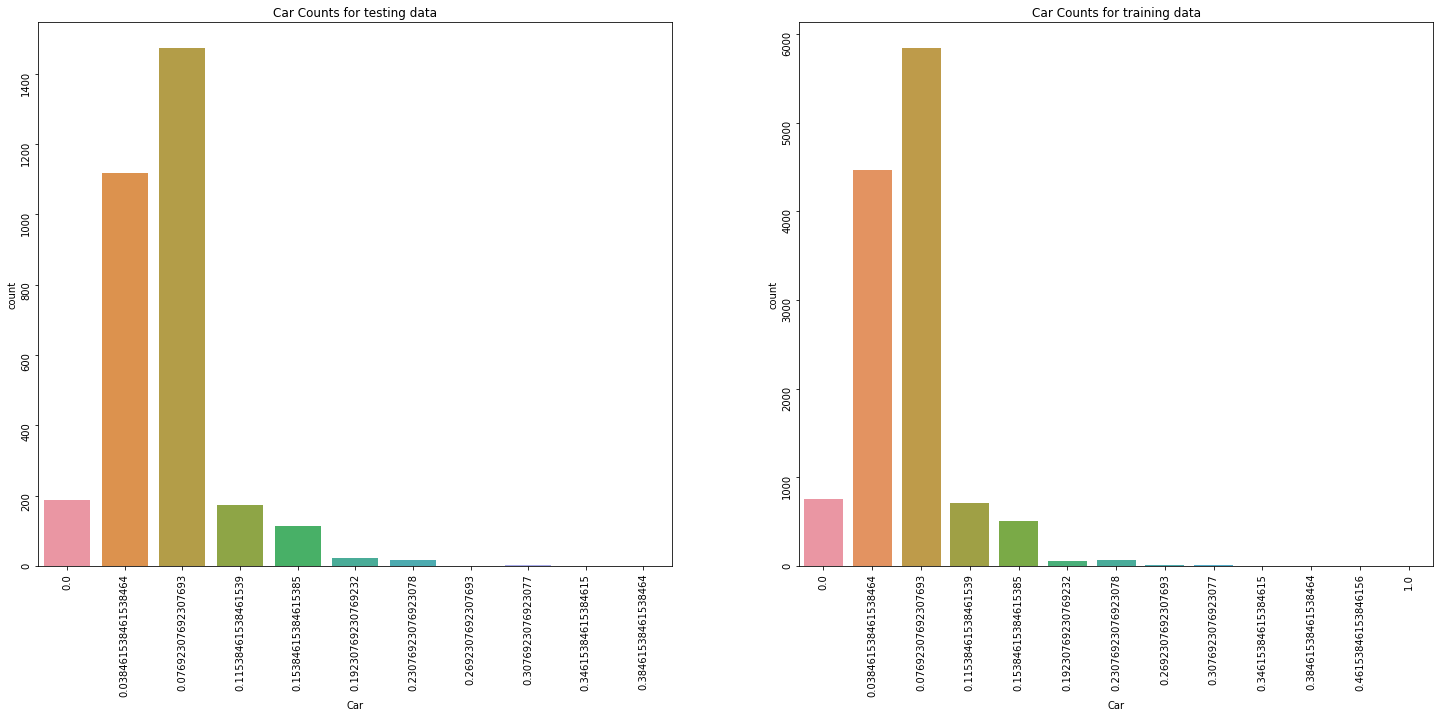

In [180]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test3, x='Car', ax=ax[0]).set(title='Car Counts for testing data')
sns.countplot(data=X_train3, x='Car', ax=ax[1]).set(title='Car Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test3.Car.value_counts())
print(X_train3.Car.value_counts())
print(features_norm.Car.value_counts())

Now the Car categories are correctly split between train and test. 

0.083333    1454
0.166667    1333
0.250000     266
0.333333      44
0.416667       9
0.666667       1
0.000000       1
0.500000       1
Name: Bathroom, dtype: int64
0.083333    5658
0.166667    5447
0.250000    1130
0.333333     140
0.416667      47
0.500000       5
0.583333       2
0.750000       1
1.000000       1
0.000000       1
Name: Bathroom, dtype: int64
0.083333    7112
0.166667    6780
0.250000    1396
0.333333     184
0.416667      56
0.500000       6
0.583333       2
0.000000       2
0.666667       1
0.750000       1
1.000000       1
Name: Bathroom, dtype: int64


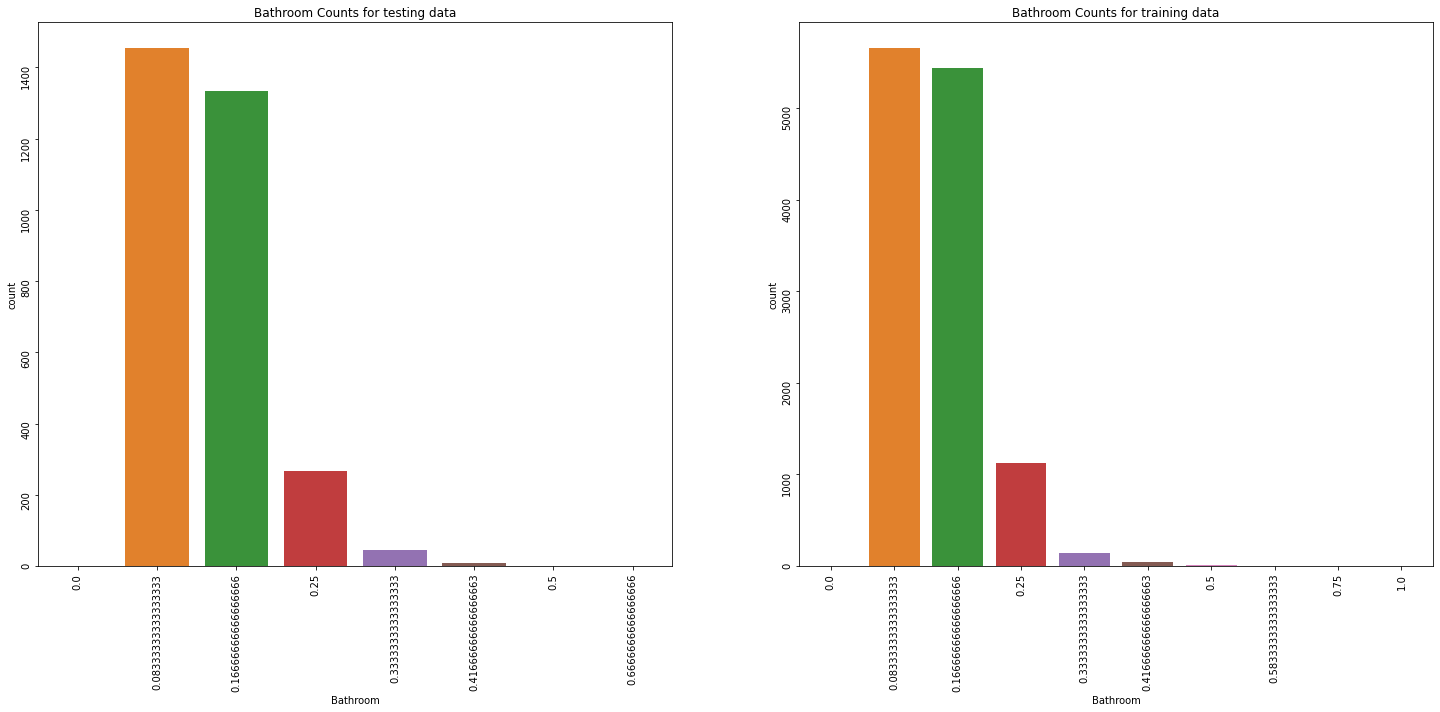

In [181]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test3, x='Bathroom', ax=ax[0]).set(title='Bathroom Counts for testing data')
sns.countplot(data=X_train3, x='Bathroom', ax=ax[1]).set(title='Bathroom Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test3.Bathroom.value_counts())
print(X_train3.Bathroom.value_counts())
print(features_norm.Bathroom.value_counts())

 I'll change the random_state to 8 and split the data to check if car and bathrrom variables properly split.

**Test Split - 20% & random_state=8**

In [182]:
features_norm4 = finaldata.drop(columns=['Price'])
target_norm4 = finaldata.Price
X_train4, X_test4, y_train4, y_test4 = train_test_split(features_norm4, target_norm4, test_size=0.20, random_state=8)

0.166667    1375
0.083333    1371
0.250000     308
0.333333      34
0.416667      14
0.500000       5
0.583333       1
0.750000       1
Name: Bathroom, dtype: int64
0.083333    5741
0.166667    5405
0.250000    1088
0.333333     150
0.416667      42
0.000000       2
0.583333       1
0.666667       1
1.000000       1
0.500000       1
Name: Bathroom, dtype: int64
0.083333    7112
0.166667    6780
0.250000    1396
0.333333     184
0.416667      56
0.500000       6
0.583333       2
0.000000       2
0.666667       1
0.750000       1
1.000000       1
Name: Bathroom, dtype: int64


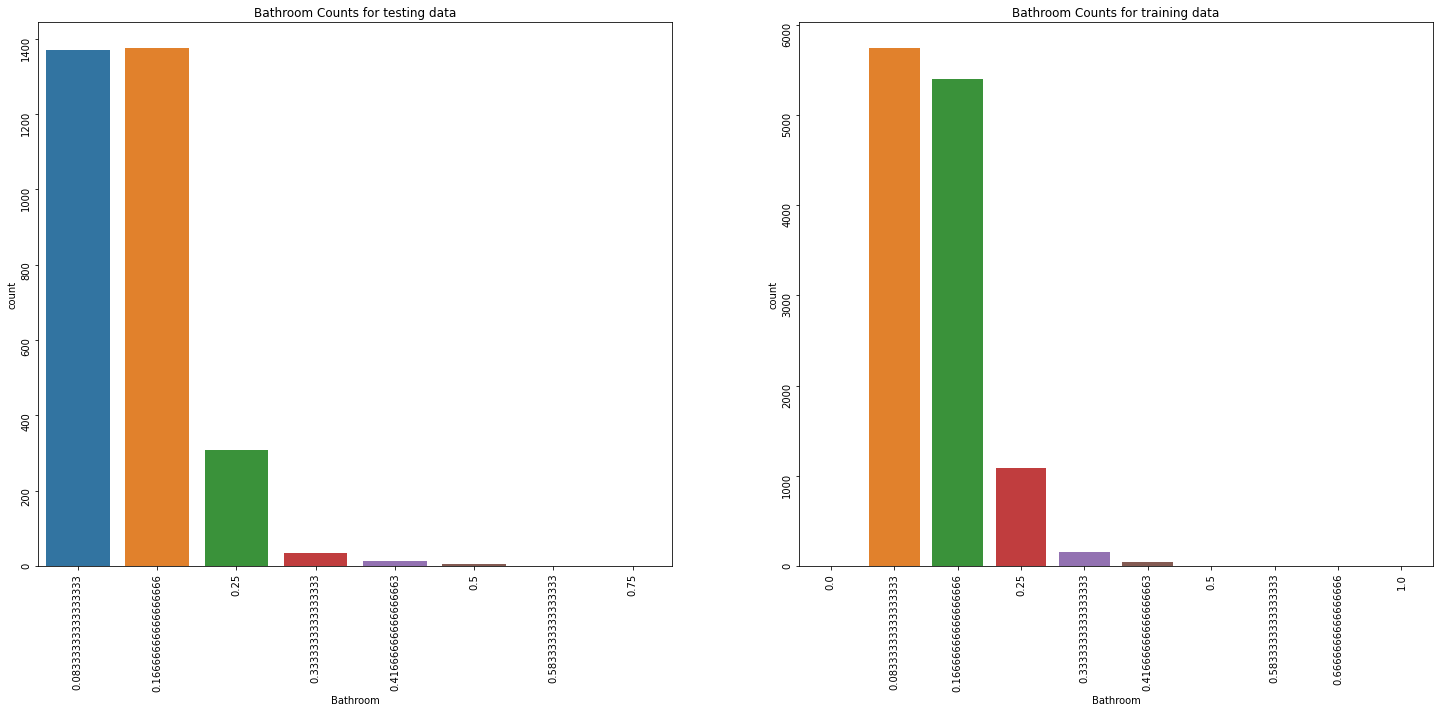

In [183]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test4, x='Bathroom', ax=ax[0]).set(title='Bathroom Counts for testing data')
sns.countplot(data=X_train4, x='Bathroom', ax=ax[1]).set(title='Bathroom Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test4.Bathroom.value_counts())
print(X_train4.Bathroom.value_counts())
print(features_norm.Bathroom.value_counts())

0.076923    1487
0.038462    1097
0.000000     183
0.115385     170
0.153846     123
0.230769      24
0.192308      18
0.307692       4
0.269231       3
Name: Car, dtype: int64
0.076923    5824
0.038462    4489
0.000000     758
0.115385     711
0.153846     495
0.230769      64
0.192308      63
0.269231      11
0.307692      10
0.384615       3
0.346154       2
0.461538       1
1.000000       1
Name: Car, dtype: int64
0.076923    7311
0.038462    5586
0.000000     941
0.115385     881
0.153846     618
0.230769      88
0.192308      81
0.269231      14
0.307692      14
0.384615       3
0.346154       2
0.461538       1
1.000000       1
Name: Car, dtype: int64


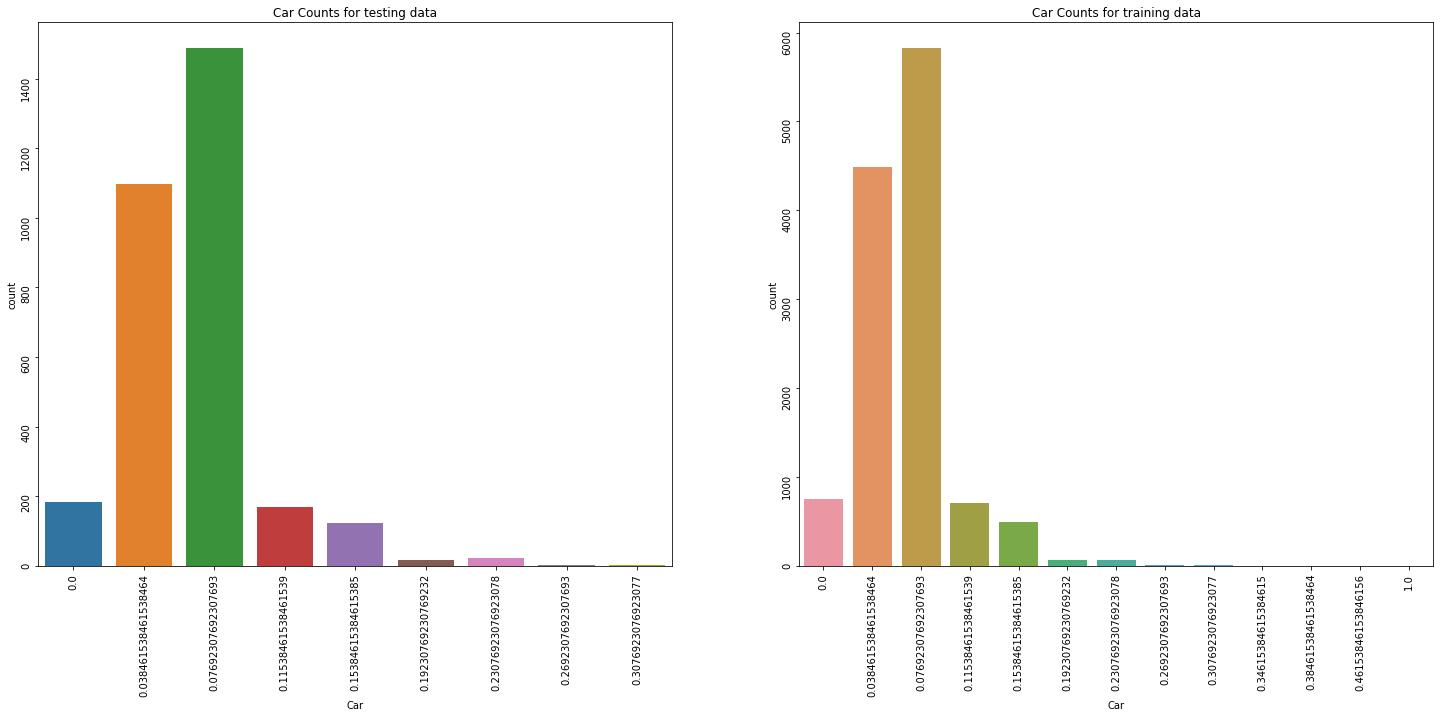

In [184]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test4, x='Car', ax=ax[0]).set(title='Car Counts for testing data')
sns.countplot(data=X_train4, x='Car', ax=ax[1]).set(title='Car Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test4.Car.value_counts())
print(X_train4.Car.value_counts())
print(features_norm.Car.value_counts())

0.181818    1272
0.272727     785
0.090909     691
0.363636     211
0.000000     115
0.454545      26
0.636364       5
0.545455       2
0.818182       2
Name: Rooms, dtype: int64
0.181818    5232
0.272727    3126
0.090909    2708
0.363636     767
0.000000     501
0.454545      79
0.545455      15
0.636364       2
1.000000       1
0.818182       1
Name: Rooms, dtype: int64


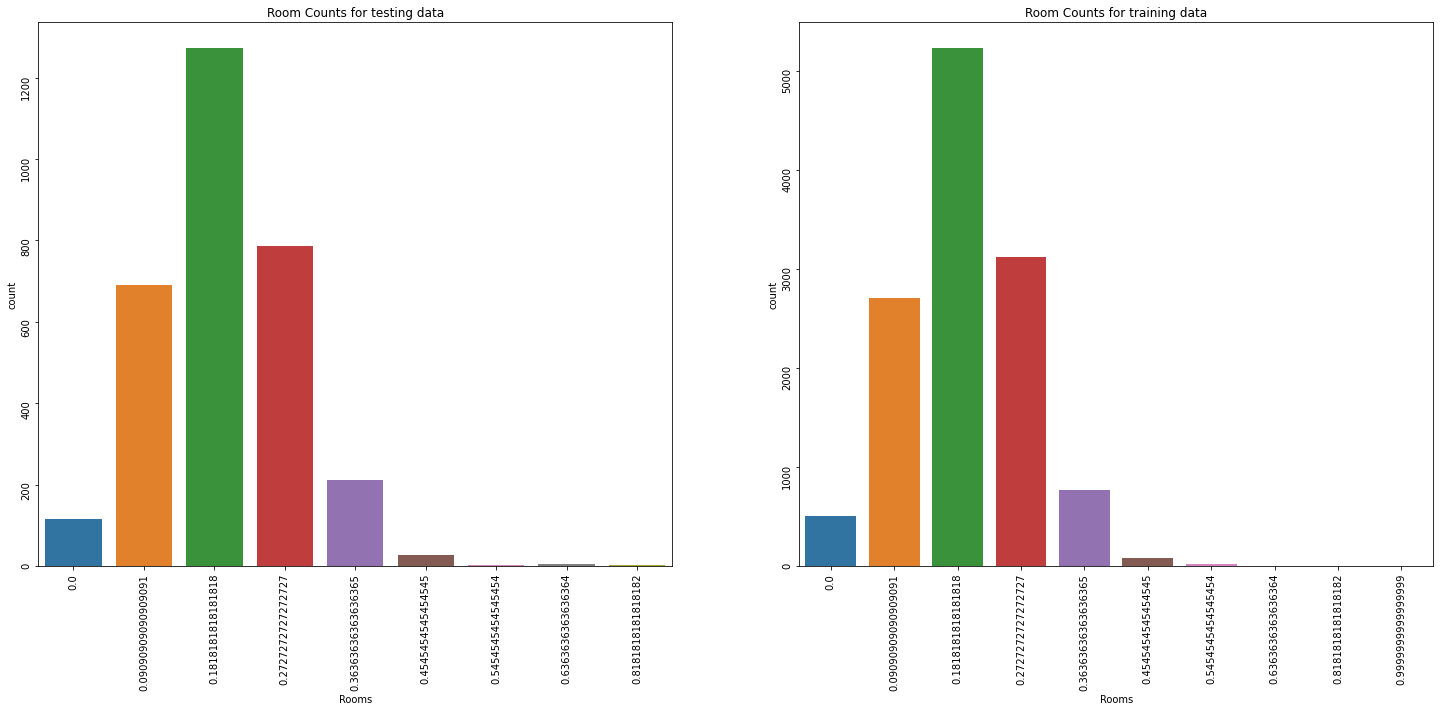

In [185]:
fig, ax = plt.subplots(1,2,figsize=(25,10))

sns.countplot(data=X_test4, x='Rooms', ax=ax[0]).set(title='Room Counts for testing data')
sns.countplot(data=X_train4, x='Rooms', ax=ax[1]).set(title='Room Counts for training data')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
print(X_test4.Rooms.value_counts())
print(X_train4.Rooms.value_counts())

[Text(0.5, 1.0, 'Date Counts for training data')]

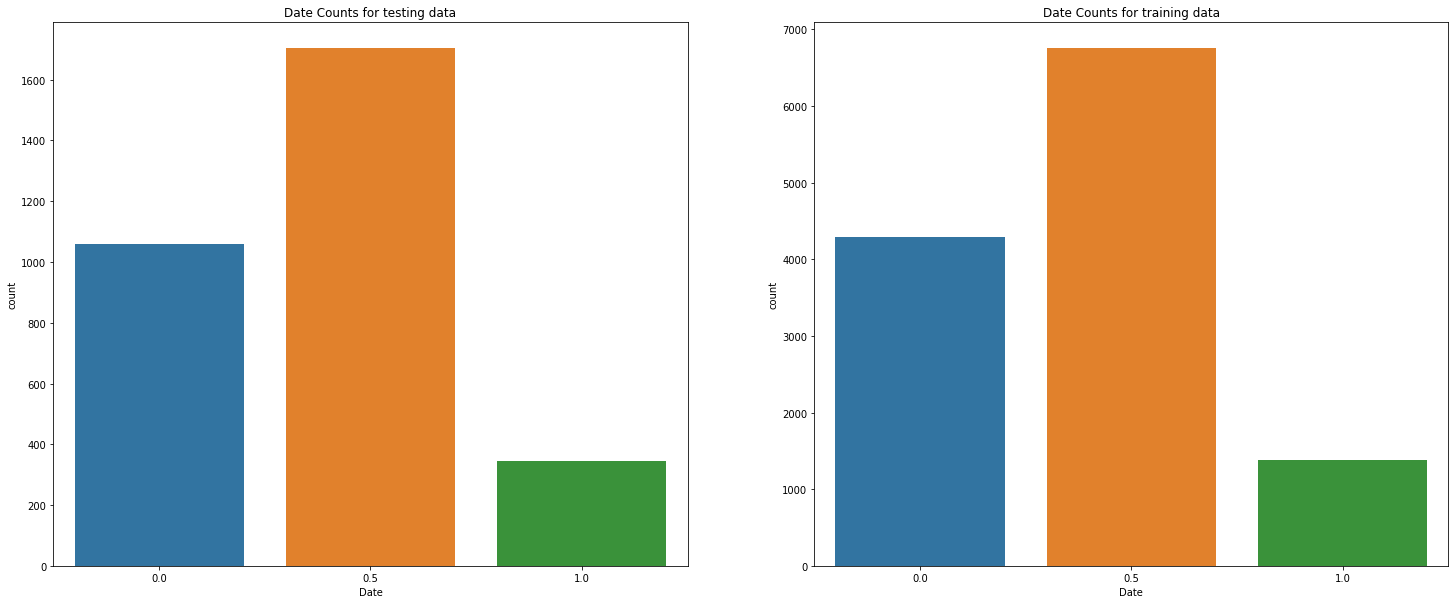

In [186]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.countplot(data=X_test4, x='Date', ax=ax[0]).set(title='Date Counts for testing data')
sns.countplot(data=X_train4, x='Date', ax=ax[1]).set(title='Date Counts for training data')

We can observe from the above plots, training set has all the categories from the test data. Therefore this is properly split and so model performance won't be effected while testing.

Let's check for the remaining columns now.

In [187]:
for column in data_onlyenc.columns:
  print("Value counts for feature" + " " +column + " " + "in training data")
  print(X_train4[column].value_counts())
  print("Value counts for feature" + " " +column + " " + "in test data")
  print(X_test4[column].value_counts())
  print("______")
  print("")

Value counts for feature t in training data
0    11434
1      998
Name: t, dtype: int64
Value counts for feature t in test data
0    2836
1     273
Name: t, dtype: int64
______

Value counts for feature u in training data
0    10170
1     2262
Name: u, dtype: int64
Value counts for feature u in test data
0    2550
1     559
Name: u, dtype: int64
______

Value counts for feature PI in training data
0    10737
1     1695
Name: PI, dtype: int64
Value counts for feature PI in test data
0    2679
1     430
Name: PI, dtype: int64
______

Value counts for feature PN in training data
0    12316
1      116
Name: PN, dtype: int64
Value counts for feature PN in test data
0    3079
1      30
Name: PN, dtype: int64
______

Value counts for feature S in training data
1    6942
0    5490
Name: S, dtype: int64
Value counts for feature S in test data
1    1739
0    1370
Name: S, dtype: int64
______

Value counts for feature SA in training data
0    12356
1       76
Name: SA, dtype: int64
Value counts f

From the above value counts we can say that each category of the Variables are properly and represesntatively split between test and train sets.

Therefore, as all the variables are properly split we can finalize the data split with 20% test set and random_state=8.

### **7. Conclusion** <br>

The Melbourne housing data has been analysed and cleaned. 
Important features have been found.
Data is normalized and split into training and test sets
so that a linear regression model be trained to predict housing prices.


### **8. References** <br>
1. Data Munging by Prof. Nicholas Brown - https://colab.research.google.com/drive/1LYlc6NP-noZoTOGAAHf2muGbkuG2wN3c?usp=sharing
<br>
2. Exploratory Data Analysis by Prof. Nicholas Brown - https://colab.research.google.com/drive/1xFqXOc2eJT78HcVDmoD0twNETiTSvUwB?usp=sharing
<br>
3. ML Workshop by Abhishek Maheshwarappa - https://github.com/abhi-gm/Machine-Learning-Workshop/blob/main/1_Linear_regression.ipynb
4. https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
5. https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/

MIT License

Copyright 2021 Kashyap Datta Kovvali

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.